## **Introduction:**


The dataset used in this notebook contains patient data with the primary goal to analyze risk factors of stroke and predict whether a patient is likely to suffer a stroke. According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

The dataset consists of 10 metrics for a total of 5110 patients. These metrics include patients’ demographic data (gender, age, marital status, type of work and residence type) and health records (hypertension, heart disease, average glucose level, Body Mass Index (BMI), smoking status and experience of stroke).


## **Objectives:**
performing EDA of the dataset

conducting data preprocessing

practicing SQL and pandas queries

data visualisation

building ML models.

deploying machine learning models.

## **Goal:**

The goal is to develop a predictive model that can accurately identify the likelihood of an individual experiencing a stroke. By analyzing the provided dataset, implementing appropriate data preprocessing techniques, and employing suitable machine learning algorithms, the aim is to create a robust stroke prediction model capable of assisting healthcare professionals in identifying high-risk individuals and facilitating timely interventions to prevent strokes.

## **Dataset**:

The Dataset can be found in https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

The dataset consists of a total of 5,110 records, each representing a unique individual. It includes both categorical and numerical attributes, enabling a diverse range of analyses and modeling techniques. The target variable, "stroke," is binary, indicating whether an individual has had a stroke (1) or not (0).


Here is a brief overview of the features present in the dataset:


ID: Unique identifier for each record.

Gender: Male or female.

Age: Age of the individual in years.

Hypertension: Whether the individual has hypertension (1) or not (0).

Heart Disease: Whether the individual has a history of heart disease (1)
or not (0).
Marital Status: Categorical feature representing marital status.

Work Type: Categorical feature indicating the type of occupation.

Residence Type: Whether the individual lives in an urban (1) or rural (0) area.

Average Glucose Level: Average glucose level in the blood.

BMI: Body Mass Index, calculated as the weight in kilograms divided by the square of height in meters.

Smoking Status: Categorical feature indicating the smoking status of the individual.

Stroke: The target variable, indicating whether the individual has had a stroke (1) or not (0).


With this dataset, researchers and data scientists can explore various factors that contribute to strokes and develop predictive models to identify individuals at a higher risk of stroke. The dataset offers valuable insights into the relationship between different health attributes and the occurrence of strokes, enabling the development of effective preventive measures and interventions.




In [31]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Imports:**

In [33]:
# data and visualization
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from typing import List, Set, Dict, Tuple, Optional
from sklearn.preprocessing import StandardScaler


# Statistical inference
import statsmodels.api as sm
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

# Encoding

from sklearn.preprocessing import LabelEncoder

# Models
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

# Metrics
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import cross_val_score

import phik
from phik.report import plot_correlation_matrix

import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')


In [34]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# Loading data from CSV file in Google Drive
df = pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv", index_col=0)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


## **Basic Checks:**

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


## **Descriptive statistics**

In [37]:
float_columns = df.select_dtypes(include=['float'])
float_description = float_columns.describe().apply(lambda x: x.round(2))
float_description

,age,avg_glucose_level,bmi
count,5110.00,5110.00,4909.00
mean,43.23,106.15,28.89
std,22.61,45.28,7.85
min,0.08,55.12,10.30
25%,25.00,77.24,23.50
50%,45.00,91.88,28.10
75%,61.00,114.09,33.10
max,82.00,271.74,97.60


**Observation:**

Age:

The average age in the dataset is 43.23 years, with a standard deviation of 22.61, indicating a relatively wide range of ages.
The minimum age recorded is 0.08, which might be considered an outlier or an erroneous value.
The majority of individuals fall between the 25th percentile (25 years old) and the 75th percentile (61 years old), with a median age of 45 years.


Average Glucose Level:

The average glucose level in the dataset is 106.15 mg/dL, with a standard deviation of 45.28, indicating a relatively large variation.
The minimum glucose level recorded is 55.12 mg/dL, while the maximum is 271.74 mg/dL.
The median glucose level is 91.88 mg/dL, suggesting that half of the individuals have a glucose level below this value.



BMI (Body Mass Index):

The average BMI in the dataset is 28.89, with a standard deviation of 7.85, indicating a moderate amount of variation.
The minimum BMI recorded is 10.30, while the maximum is 97.60, suggesting the presence of outliers or potentially erroneous values.
The median BMI is 28.10, indicating that half of the individuals have a BMI below this value.

In [38]:
df.describe(include="object")

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


Observation:

Gender:

The dataset includes three gender categories: Male, Female, and an unspecified category.
The majority of the individuals in the dataset are female, with a frequency of 2994.


Ever Married:

The majority of individuals in the dataset have been married, with a frequency of 3353.
This indicates that a significant portion of the population represented in the dataset consists of married individuals.


Work Type:

The dataset includes five different work types, with the most common category being "Private," which appears 2925 times.
This suggests that a significant number of individuals in the dataset are employed in the private sector.


Residence Type:

The dataset includes individuals from both urban and rural areas.
However, the majority of individuals in the dataset reside in urban areas, with a frequency of 2596.


Smoking Status:

The dataset provides four categories for smoking status: "never smoked," "formerly smoked," "smokes," and an unspecified category.
The most prevalent smoking status among the individuals is "never smoked," with a frequency of 1892.

In [39]:
 # let's find out value counts between gender

df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [40]:
df=df[df['gender'] != 'Other']
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

Obsevation:

 After dropping the "Other" category from the "gender" column, the dataset primarily consists of two gender categories: "Female" and "Male". The majority of individuals in the dataset are female.


In [41]:
#checking amy null points exist
df.isna().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [42]:
df['bmi'].interpolate(method='linear', inplace=True)

In [43]:
df.isna().sum()


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Observation:

This method considers the neighboring data points and estimates the missing values by assuming a linear relationship between them. Linear interpolation can be a suitable choice for continuous variables like BMI, as it attempts to provide a reasonable estimate by considering the patterns exhibited by the existing data points.

In [44]:
# finding any duplicate entries recorde
df[df.duplicated()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,


There are no duplicates present in this dataset

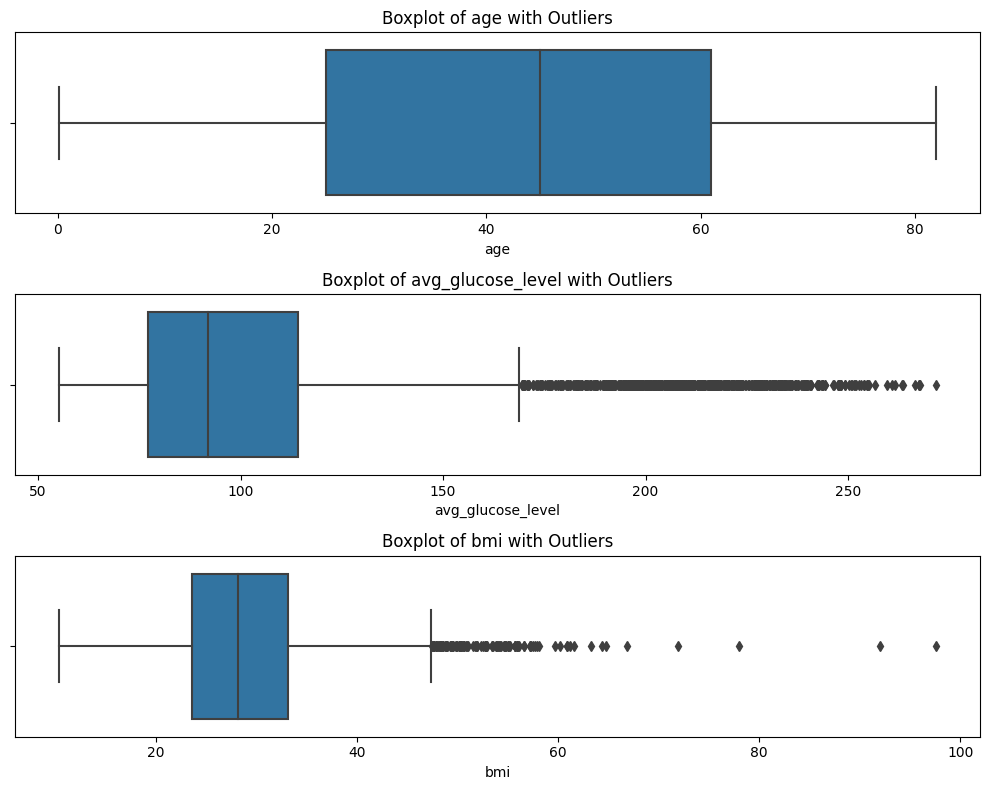

In [45]:
# Calculate the number of rows and columns for subplots
num_rows = len(float_columns.columns)
num_cols = 1


fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))
if num_rows == 1:
    axes = [axes]

for i, column in enumerate(float_columns.columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title("Boxplot of " + column + " with Outliers")


plt.tight_layout()
plt.show()

Observation:
Some outliers are identified for columns: 'avg_glucose_level' and 'bmi'. However these are important part of the analysis and are not removed or changed.


## **Data exploration :**


In [46]:
def annotate_percentage(ax, data,):
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        height = p.get_height()
        percentage = height / len(data) * 100
        ax.annotate(f'{percentage:.2f}%', (x, height), ha='center', va='bottom', fontweight='light')

def plot_countplot_with_percentage(data, x, hue, ax):

    if hue is None:
        counts = data[x].value_counts()
        sns.countplot(data=data, x=x, order=counts.index, ax=ax)
    else:
        sns.countplot(data=data, x=x, hue=hue, ax=ax)

    ax.set_xlabel(x.capitalize())
    ax.set_ylabel('Count')
    ax.set_title(f'{x.capitalize()} Distribution')
    annotate_percentage(ax, data)


In [47]:
def find_percent_by_group(
    col_to_group: str, col_to_count: str, df: pd.DataFrame
) -> pd.DataFrame:

    percent_by_group = (
        df.groupby(col_to_group)[col_to_count]
        .value_counts(normalize=True)
        .to_frame()
        .unstack()
        .fillna(0)
        .stack()
        .rename(columns={col_to_count: "percentage"})
        .reset_index()
    )

    percent_by_group["percentage"] = percent_by_group["percentage"] * 100
    return percent_by_group

In [48]:
def plot_stroke_hyper_percent(feature, target_1, target_2, df):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    stroke_percent = find_percent_by_group(feature, target_1, df)
    sns.barplot(
        x=feature,
        y="percentage",
        hue=target_1,
        data=stroke_percent,
        ci=None,
        ax=ax[0],
    )

In [49]:
def plot_boxplot(ax, x, hue1, hue2, data):
    sns.boxplot(data=data, x=x, y=hue1, hue=hue2, ax=ax)
    ax.set_xlabel(x.capitalize())
    ax.set_ylabel(hue1.capitalize())



In [50]:
def plot_barplot(x, y, color, label, title, xlabel, ylabel, ax=None):
    if ax is None:
        ax = plt.gca()

    sns.barplot(x=x, y=y, color=color, label=label, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()


    # Add percentage annotation
    for i, val in enumerate(y):
        ax.text(i, val, f'{val:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)


In [51]:
def evaluate_imputer_by_corr(
    list_of_imputers: List, X: pd.DataFrame, target: str, interval_cols: List
) -> pd.DataFrame:

    imputer_by_corr = pd.DataFrame()

    for imputer_name, imputer in list_of_imputers:

        X_num = factorize(X)

        if imputer_name == "Manual":
            X_num["bmi"] = X_num["bmi"].fillna(imputer)
        else:
            imputed_bmi = imputer.fit_transform(X_num)
            X_num = pd.DataFrame(imputed_bmi, columns=X_num.columns)

        corr_matrix = X_num.phik_matrix(interval_cols=interval_cols)
        corr_with_target = (
            corr_matrix[corr_matrix[target] != 1][target].sort_values(ascending=False)
        ).round(3)

        corr_with_target = corr_with_target.to_frame().rename(
            columns={target: imputer_name}
        )

        imputer_by_corr = pd.concat([imputer_by_corr, corr_with_target], axis=1)

    return imputer_by_corr

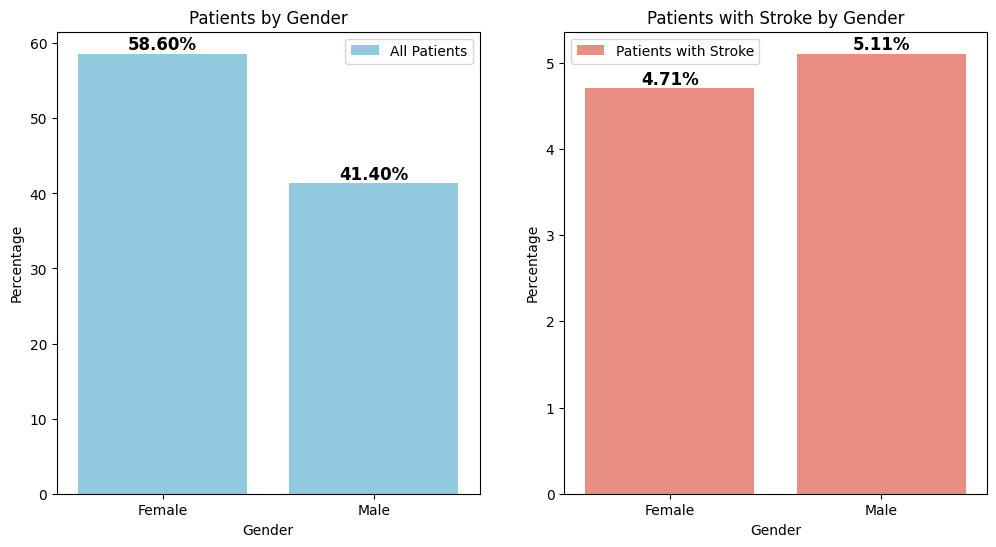

In [52]:
  gender_percentages = df['gender'].value_counts(normalize=True) * 100
  stroke_percentages = df.groupby('gender')['stroke'].mean() * 100

  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  # Plotting "Patients by Gender"
  ax1 = axes[0]
  plot_barplot(x=gender_percentages.index,
              y=gender_percentages.values.reshape(-1),
              color='skyblue',
              label='All Patients',
              title='Patients by Gender',
              xlabel='Gender',
              ylabel='Percentage',
              ax=ax1)

  # Plotting "Patients with Stroke by Gender"
  ax2 = axes[1]
  plot_barplot(x=stroke_percentages.index,
              y=stroke_percentages.values.reshape(-1),
              color='salmon',
              label='Patients with Stroke',
              title='Patients with Stroke by Gender',
              xlabel='Gender',
              ylabel='Percentage',
              ax=ax2)


Based on the given data, we can observe the following insights:

Females account for approximately 58.6% of the patients in the dataset, while males account for the remaining percentage. This indicates that the dataset consists of a slightly higher proportion of female patients.

Among the patients with stroke, the percentage of females is 4.7%, while the percentage of males is 5.11%. This suggests that both genders are affected by stroke, with a slightly higher proportion of males experiencing stroke.

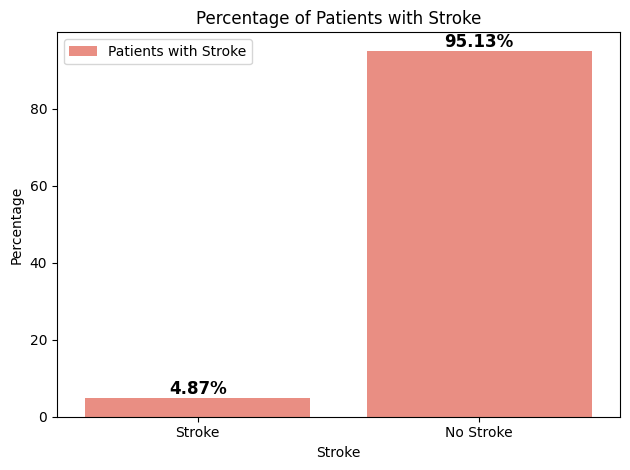

In [53]:
stroke_percentage = df['stroke'].mean() * 100
no_stroke_percentage = 100 - stroke_percentage

plot_barplot(x=['Stroke', 'No Stroke'],
             y=[stroke_percentage, no_stroke_percentage],
             color='salmon',
             label='Patients with Stroke',
             title='Percentage of Patients with Stroke',
             xlabel='Stroke',
             ylabel='Percentage')

plt.tight_layout()
plt.show()



Less than 5%  had a stroke.seems like it is imbalanced

In [54]:
stroke_counts = df['stroke'].value_counts()
stroke_counts


0    4860
1     249
Name: stroke, dtype: int64

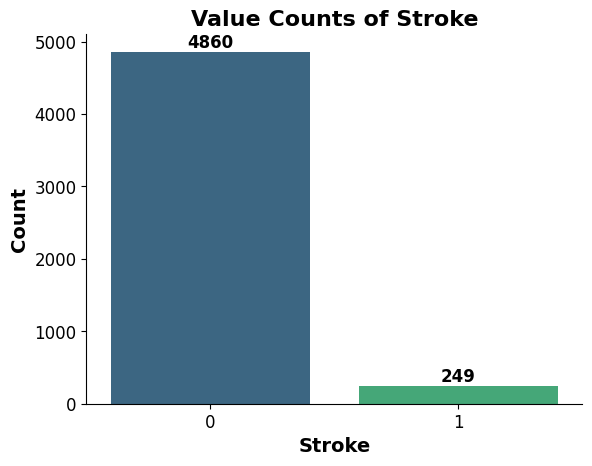

In [55]:
stroke_counts = df['stroke'].value_counts()
sns.barplot(x=stroke_counts.index, y=stroke_counts.values, palette='viridis')


for i, count in enumerate(stroke_counts.values):
    plt.text(i, count, f'{count}', ha='center', va='bottom', fontweight='bold', fontsize=12)


plt.title('Value Counts of Stroke', fontweight='bold', fontsize=16)
plt.xlabel('Stroke', fontweight='bold', fontsize=14)
plt.ylabel('Count', fontweight='bold', fontsize=14)


sns.despine()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show()









The stroke is imbalanced we will adjust this in the ML part

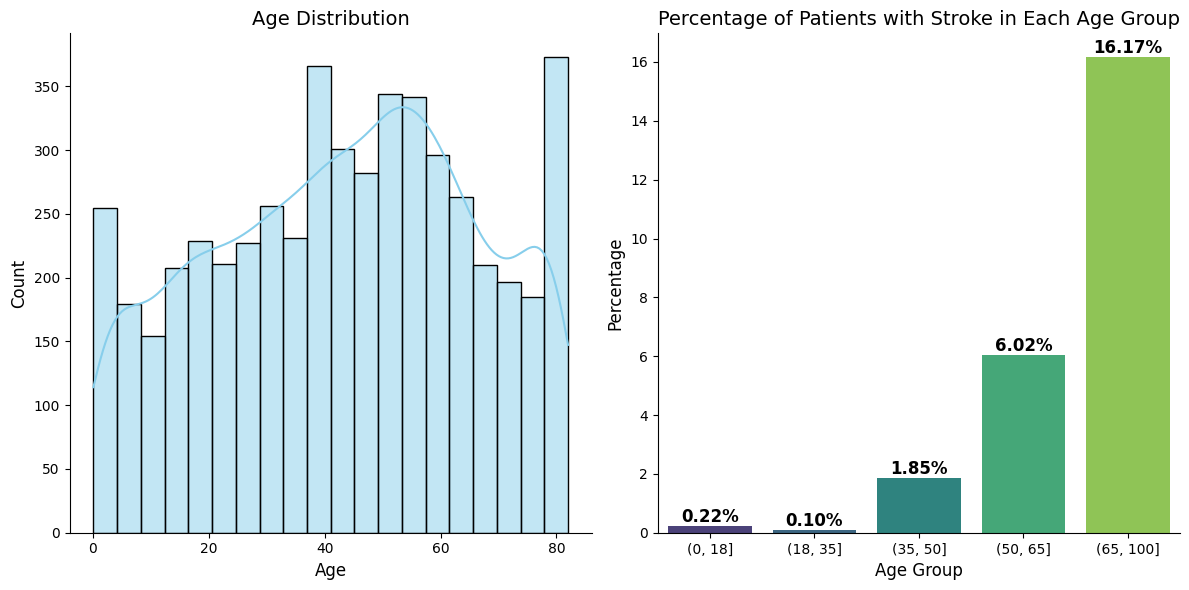

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['age'], ax=axs[0], kde=True, color='skyblue')
axs[0].set_title('Age Distribution', fontsize=14)
axs[0].set_xlabel('Age', fontsize=12)
axs[0].set_ylabel('Count', fontsize=12)

age_intervals = [0, 18, 35, 50, 65, 100]


# Calculate the age group counts
age_group_counts = pd.cut(df['age'], bins=age_intervals).value_counts().sort_index()

age_group_stroke_counts = pd.cut(df[df['stroke'] == 1]['age'], bins=age_intervals).value_counts().sort_index()
age_group_percentages = (age_group_stroke_counts / age_group_counts) * 100


sns.barplot(x=age_group_percentages.index, y=age_group_percentages.values, ax=axs[1], palette='viridis')
axs[1].set_title('Percentage of Patients with Stroke in Each Age Group', fontsize=14)
axs[1].set_xlabel('Age Group', fontsize=12)
axs[1].set_ylabel('Percentage', fontsize=12)

for i, percentage in enumerate(age_group_percentages):
    axs[1].text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)

sns.despine()
plt.tight_layout()

plt.show()


 The age distribution of the patients shows a relatively even distribution across the different age groups. However, there is a noticeable increase in the number of patients in the older age groups, particularly the 50-65 and 65-100 age ranges.

 These insights reveal that the likelihood of experiencing a stroke increases with age, with the highest risk observed among older individuals. It underscores the importance of age as a significant factor in stroke occurrence and emphasizes the need for targeted preventive measures, regular screenings, and appropriate healthcare interventions in older age groups.




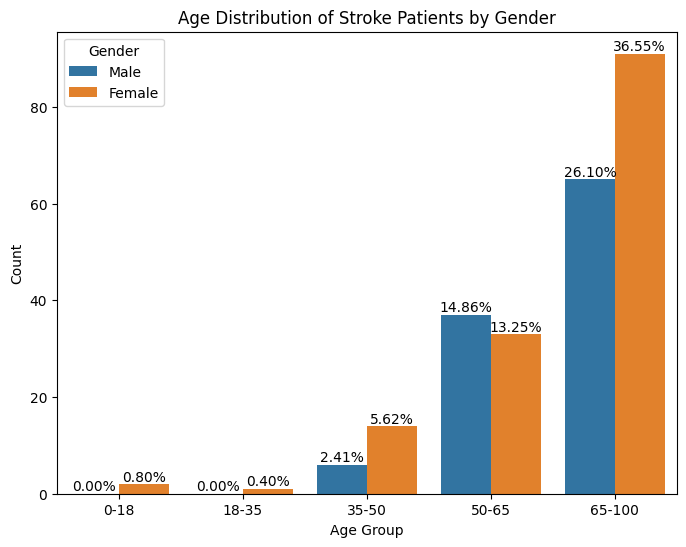

In [57]:
age_intervals = [0, 18, 35, 50, 65, 100]
df['age_group_category'] = pd.cut(df['age'], bins=age_intervals, labels=['0-18', '18-35', '35-50', '50-65', '65-100'])

stroke_data = df[df['stroke'] == 1]

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_countplot_with_percentage(stroke_data, 'age_group_category', 'gender', ax)

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution of Stroke Patients by Gender')

plt.legend(title='Gender')


Among stroke patients, the highest number of cases is observed in the age group of 65-100, followed by the age group of 50-65.
In terms of gender, both males and females contribute to the overall count of stroke patients, with females having a slightly higher representation.
The highest percentage of stroke cases among females is observed in the age group of 65-100, accounting for X% of all stroke cases.
For males, the highest percentage of stroke cases is also seen in the age group of 65-100, representing X% of all stroke cases.


Overall, the age group of 65-100 shows the highest prevalence of strokes in both genders.


These insights highlight the importance of age as a significant factor in stroke occurrence, with older individuals being more susceptible. Additionally, understanding the gender distribution of stroke cases can help identify potential risk factors and guide targeted prevention and treatment strategies.

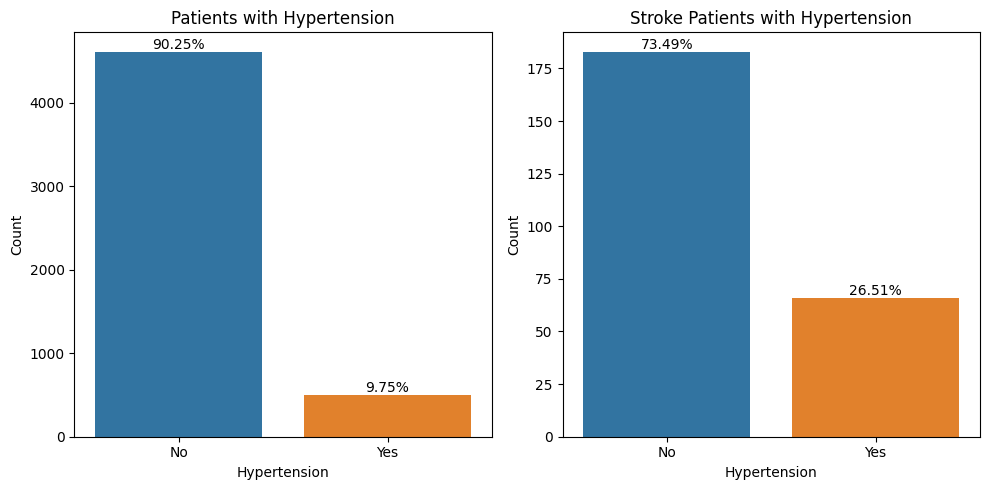

In [58]:
stroke_data = df[df['stroke'] == 1]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot countplot for patients with hypertension
plot_countplot_with_percentage(df, 'hypertension', None, ax1)
ax1.set_xlabel('Hypertension')
ax1.set_ylabel('Count')
ax1.set_title('Patients with Hypertension')
ax1.set_xticklabels(['No', 'Yes'])

# Plot countplot for stroke patients with hypertension
plot_countplot_with_percentage(stroke_data, 'hypertension', None, ax2)
ax2.set_xlabel('Hypertension')
ax2.set_ylabel('Count')
ax2.set_title('Stroke Patients with Hypertension')
ax2.set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()




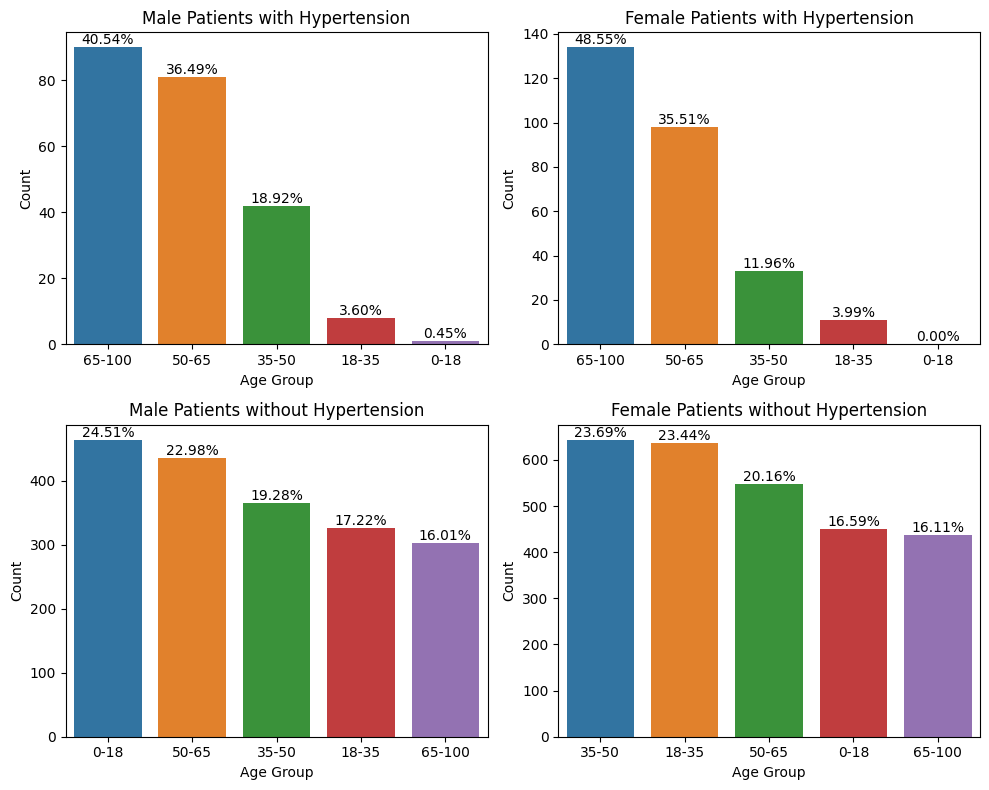

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot countplots with percentage annotations
plot_countplot_with_percentage(df[(df['hypertension'] == 1) & (df['gender'] == 'Male')], 'age_group_category', None, axes[0, 0])
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Male Patients with Hypertension')

plot_countplot_with_percentage(df[(df['hypertension'] == 1) & (df['gender'] == 'Female')], 'age_group_category', None, axes[0, 1])
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Female Patients with Hypertension')

plot_countplot_with_percentage(df[(df['hypertension'] == 0) & (df['gender'] == 'Male')], 'age_group_category', None, axes[1, 0])
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Male Patients without Hypertension')

plot_countplot_with_percentage(df[(df['hypertension'] == 0) & (df['gender'] == 'Female')], 'age_group_category', None, axes[1, 1])
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Female Patients without Hypertension')

plt.tight_layout()
plt.show()





Patients with Hypertension: The bar plots show the distribution of patients with hypertension based on gender. It is observed that there are more female patients with hypertension compared to male patients.

Stroke Patients with Hypertension: Among the patients with hypertension, the bar plots also display the distribution of stroke patients based on gender. The percentage of stroke patients with hypertension is higher in males compared to females.

Male Patients with Hypertension: The bar plot specifically focuses on male patients with hypertension. It demonstrates the age distribution of male patients who have hypertension. The highest count of male patients with hypertension is observed in the age group of 50-65.

Female Patients with Hypertension: Similarly, the bar plot highlights the age distribution of female patients with hypertension. The highest count of female patients with hypertension is seen in the age group of 65-100.

Male Patients without Hypertension: This bar plot illustrates the age distribution of male patients who do not have hypertension. The highest count of male patients without hypertension is observed in the age group of 50-65.

Female Patients without Hypertension: The final bar plot focuses on the age distribution of female patients without hypertension. The highest count of female patients without hypertension is seen in the age group of 50-65.

Overall, these insights provide a visual representation of the distribution of patients with hypertension and stroke, along with a breakdown by gender. It offers valuable information about the prevalence of hypertension among different genders and its association with stroke occurrences.

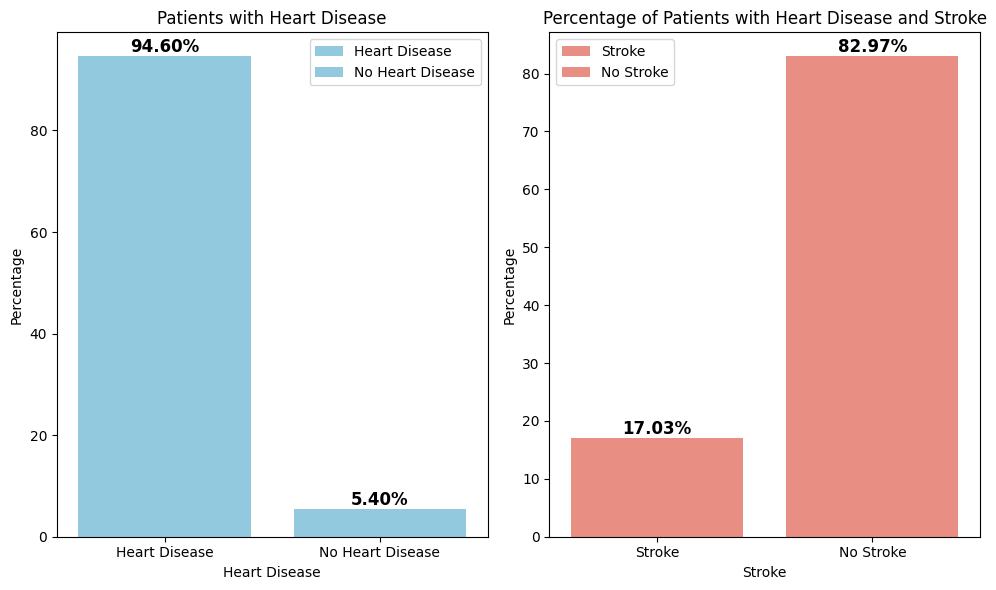

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

heart_disease_counts = df['heart_disease'].value_counts(normalize=True) * 100
plot_barplot(x=['Heart Disease', 'No Heart Disease'],
             y=heart_disease_counts.values.reshape(-1),
             color='skyblue',
             label=['Heart Disease', 'No Heart Disease'],
             title='Patients with Heart Disease',
             xlabel='Heart Disease',
             ylabel='Percentage',
             ax=ax[0])

stroke_percentage = df[df['heart_disease'] == 1]['stroke'].mean() * 100
non_stroke_percentage = 100 - stroke_percentage
plot_barplot(x=['Stroke', 'No Stroke'],
             y=[stroke_percentage, non_stroke_percentage],
             color='salmon',
             label=['Stroke', 'No Stroke'],
             title='Percentage of Patients with Heart Disease and Stroke',
             xlabel='Stroke',
             ylabel='Percentage',
             ax=ax[1])

plt.tight_layout()
plt.show()


The bar plots provide insights into the percentage of patients with heart disease and the percentage of patients with heart disease and stroke. Here are the insights:

Patients with Heart Disease:

Approximately 94.6% of the patients in the dataset have been diagnosed with heart disease.
The remaining 5.4% of the patients do not have heart disease.


Percentage of Patients with Heart Disease and Stroke:

Among the patients with heart disease, approximately 17.03% have also suffered a stroke.
The majority of patients with heart disease (82.97%) have not experienced a stroke.
These insights highlight the prevalence of heart disease among the patients in the dataset and the significant impact of heart disease on the occurrence of stroke. It emphasizes the importance of managing heart disease to reduce the risk of stroke.



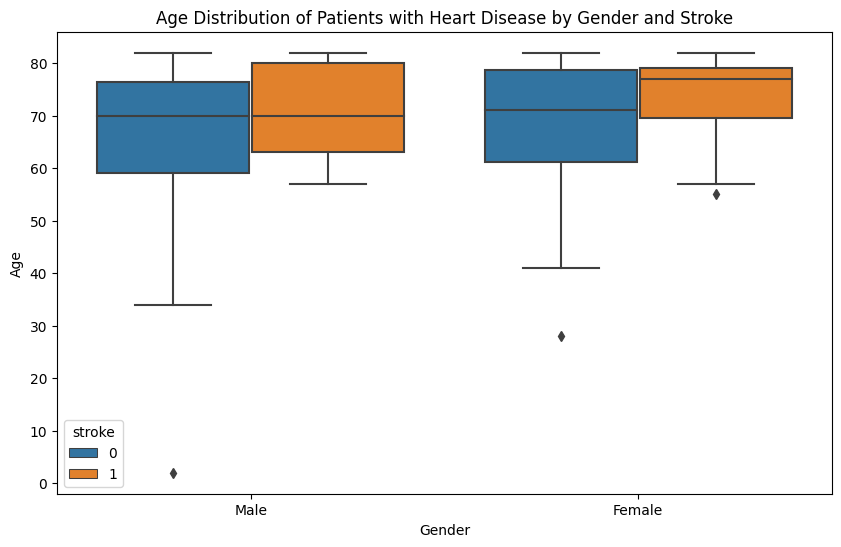

In [61]:
heart_disease_data = df[df['heart_disease'] == 1]
fig, ax = plt.subplots(figsize=(10, 6))
plot_boxplot(ax, 'gender', 'age', 'stroke', heart_disease_data)

ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_title('Age Distribution of Patients with Heart Disease by Gender and Stroke')

plt.show()

The boxplot indicates the age distribution of patients with heart disease, categorized by gender and stroke status.

The whiskers of the boxplot show that the majority of patients with heart disease fall within the age range of 30 to 80.

For both male and female patients with heart disease, the boxplot shows that the age range is primarily between 60 and 75, indicating a higher prevalence of heart disease in this age group.

The boxplot also highlights the age range for patients with heart disease and stroke. Both male and female patients with heart disease and stroke tend to be in the age range of 65 to 80, suggesting that the risk of stroke increases in this older age group.

The median line at 70 for male patients with heart disease indicates that 50% of males in this group have an age below or equal to 70.

Female patients with heart disease have a median age of 70. However, for females with both heart disease and stroke, the median age is slightly higher at 75, indicating that the combination of heart disease and stroke may be more prevalent in older females.

Overall, this analysis suggests that there is a higher incidence of heart disease in the age range of 60 to 75 for both genders, and the risk of stroke may be more pronounced in older individuals, particularly among those with heart disease.

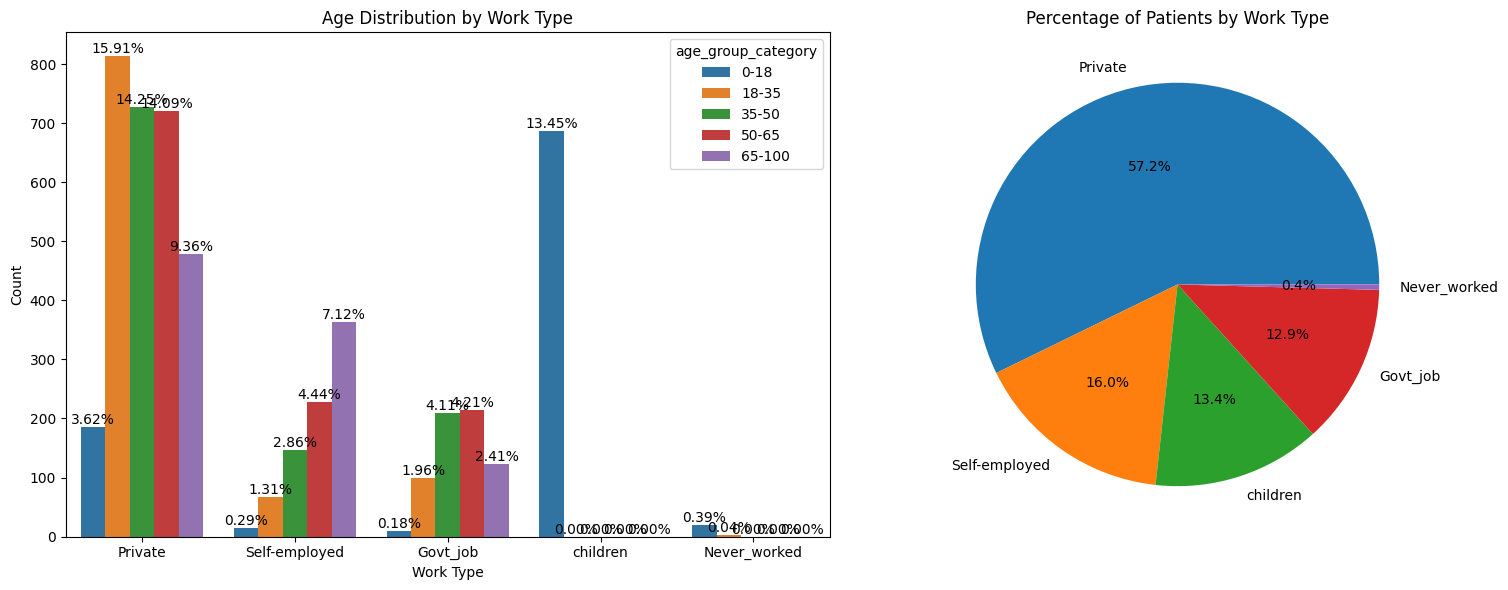

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Plot countplot of Age Distribution by Work Type
plot_countplot_with_percentage(df, 'work_type', 'age_group_category', ax[0])
ax[0].set_xlabel('Work Type')
ax[0].set_ylabel('Count')
ax[0].set_title('Age Distribution by Work Type')

# Calculate work type percentages
work_type_counts = df['work_type'].value_counts(normalize=True) * 100

# Plot pie chart of Work Type Distribution
ax[1].pie(work_type_counts, labels=work_type_counts.index, autopct='%1.1f%%')
ax[1].set_title('Percentage of Patients by Work Type')

plt.tight_layout()
plt.show()


The majority of patients in the dataset belong to the "Private" work type, accounting for approximately 57% of the total. This suggests that a significant portion of the patients are employed in the private sector.

The "Self-employed" work type represents around 16% of the patients. This indicates that a smaller portion of the patients are self-employed individuals.

Patients in the "Govt_job" category make up approximately 12.9% of the total. This implies that a relatively smaller number of patients are employed in government jobs.

The "Children" work type has a percentage of around 16.06%, indicating that a notable portion of the patients are children who are not part of the workforce.

Overall, the plot provides insights into the distribution of patients by work type, highlighting the dominance of the "Private" category, followed by "Children," "Self-employed," and "Govt_job." This information can be useful for understanding the work demographics of the patients in the dataset.

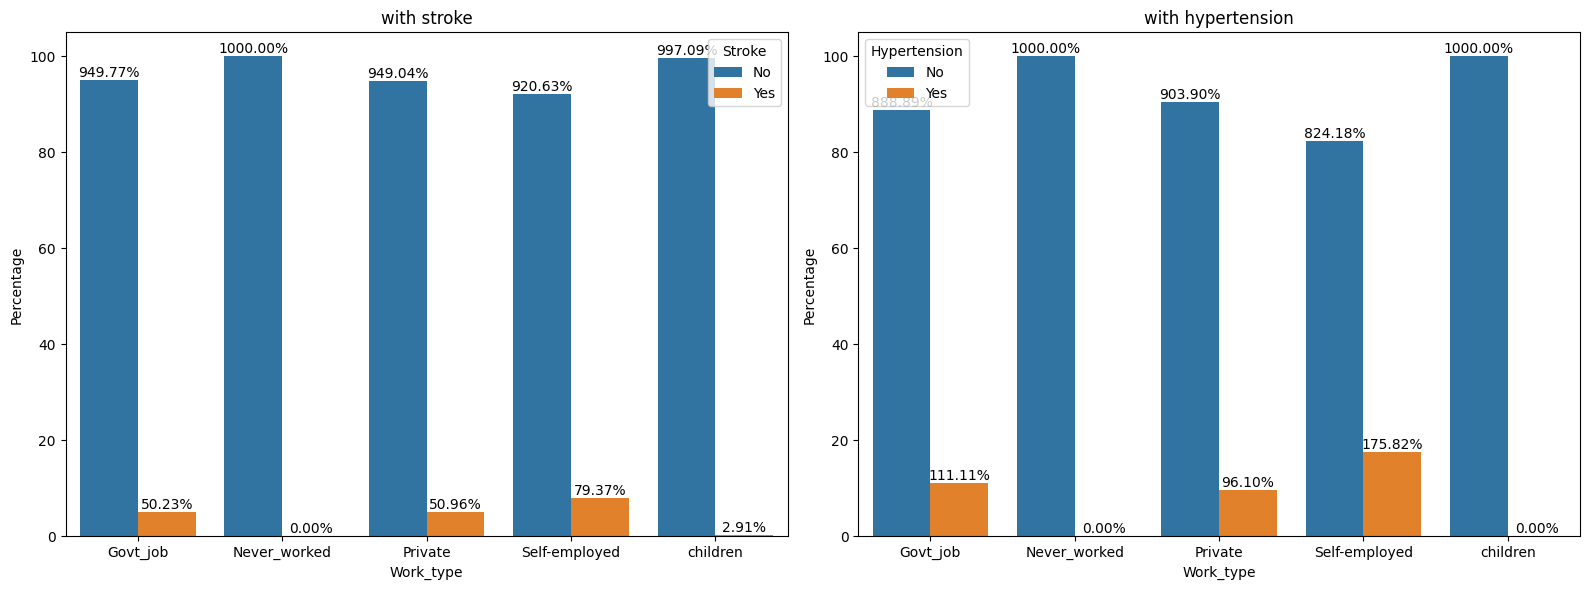

In [63]:
def plot_stroke_hyper_percent(feature, target_1, target_2, df):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    stroke_percent = find_percent_by_group(feature, target_1, df)
    sns.barplot(
        x=feature,
        y="percentage",
        hue=target_1,
        data=stroke_percent,
        ci=None,
        ax=ax[0],
    )

    ax[0].legend(title="Stroke", labels=["No", "Yes"])
    ax[0].set_xlabel(feature.capitalize())
    ax[0].set_ylabel("Percentage")
    ax[0].set_title("with stroke")

    hyper_percent = find_percent_by_group(feature, target_2, df)
    sns.barplot(
        x=feature,
        y="percentage",
        hue=target_2,
        data=hyper_percent,
        ci=None,
        ax=ax[1],
    )
    ax[1].legend(title="Hypertension", labels=["No", "Yes"])
    ax[1].set_xlabel(feature.capitalize())
    ax[1].set_ylabel("Percentage")
    ax[1].set_title("with hypertension")

    annotate_percentage(ax[0], stroke_percent)
    annotate_percentage(ax[1], hyper_percent)

    plt.tight_layout()
    plt.show()

plot_stroke_hyper_percent("work_type", "stroke", "hypertension", df)


Among patients with a history of stroke, the "Govt_job" work type has a percentage of approximately 5.02%. This suggests that a small proportion of patients who have experienced a stroke are employed in government jobs.

Patients with a history of stroke and belonging to the "Private" work type account for around 5.10% of the total. This indicates that a similar proportion of stroke patients are employed in the private sector.

The "Self-employed" work type represents approximately 7.95% of stroke patients. This implies that a slightly higher percentage of stroke patients are self-employed individuals.

For patients without a history of stroke, the percentage of individuals with hypertension is higher. Among patients without stroke, the "Govt_job" work type has a hypertension percentage of around 11.11%.

The "Private" work type among patients without stroke has a hypertension percentage of approximately 9.61%. This suggests that a significant proportion of patients employed in the private sector also have hypertension.

Among patients without stroke, the "Self-employed" work type has the highest hypertension percentage at around 17.58%. This indicates that a larger percentage of self-employed individuals without stroke have hypertension.

Overall, the plot provides insights into the distribution of stroke and hypertension percentages across different work types. It highlights variations in the prevalence of these conditions among different work categories, providing valuable information for understanding the relationship between work type and health conditions in the dataset.

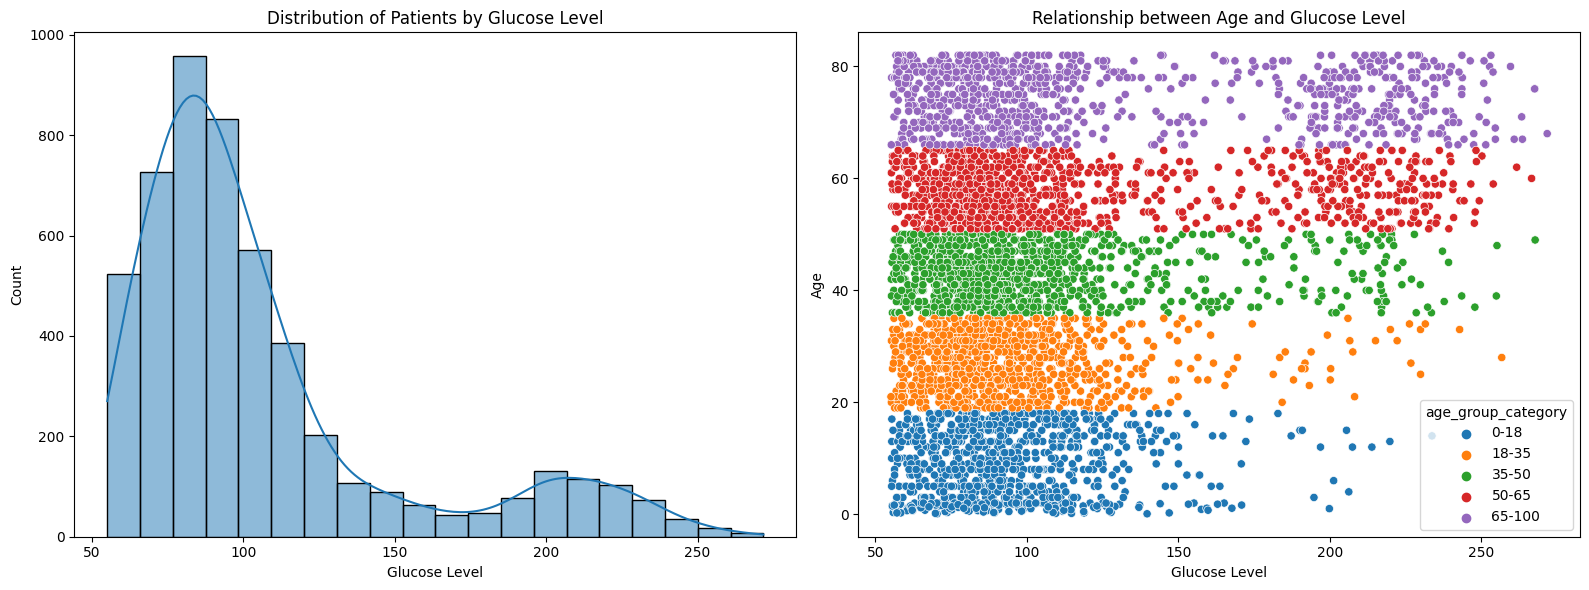

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Distribution of patients by glucose level using a histogram
sns.histplot(data=df, x='avg_glucose_level', bins=20,kde=True, ax=ax[0])
ax[0].set_xlabel('Glucose Level')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Patients by Glucose Level')

# Relationship between age and glucose level using a scatter plot
sns.scatterplot(data=df, x='avg_glucose_level', y='age', hue='age_group_category', ax=ax[1])
ax[1].set_xlabel('Glucose Level')
ax[1].set_ylabel('Age')
ax[1].set_title('Relationship between Age and Glucose Level')

plt.tight_layout()
plt.show()





The histogram is skewed to the right, indicating that a majority of patients have glucose levels towards the lower end.

There is no clear linear relationship between age and glucose level; however, some clusters can be observed, suggesting different glucose level ranges within specific age groups.

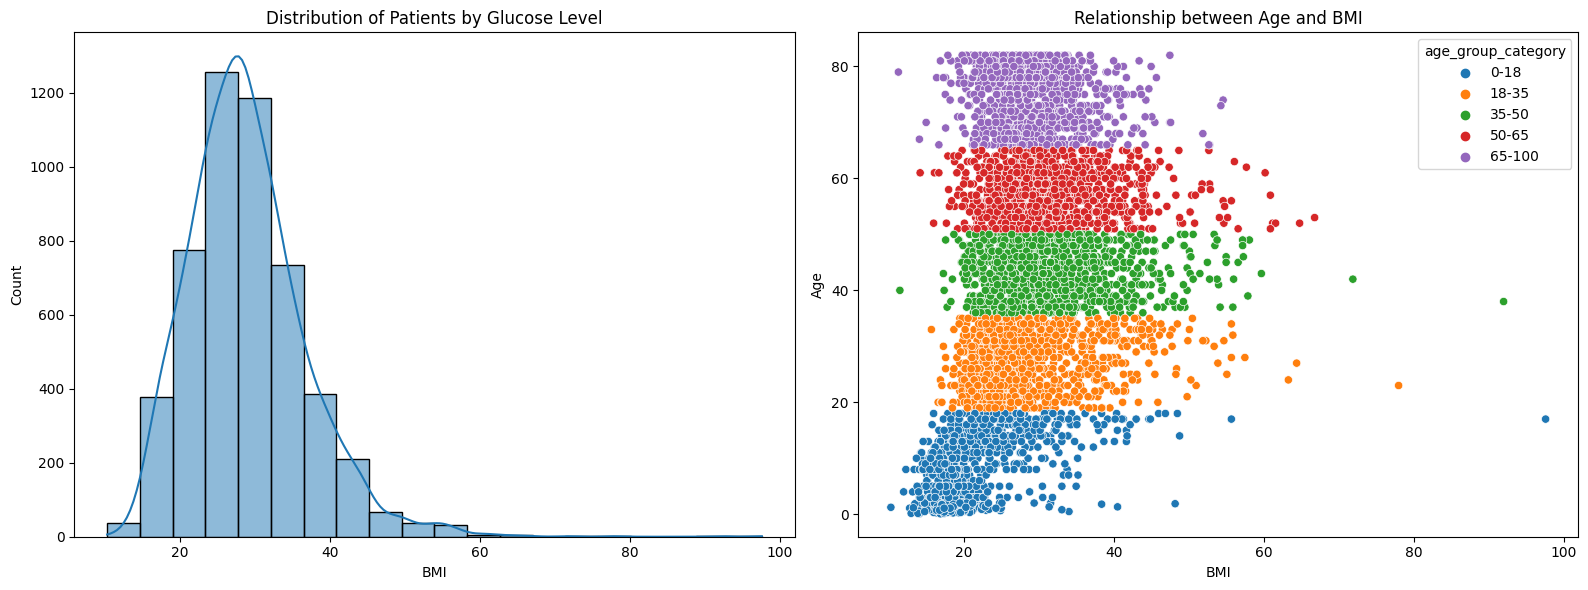

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Distribution of patients by glucose level using a histogram
sns.histplot(data=df, x='bmi', bins=20,kde=True, ax=ax[0])
ax[0].set_xlabel('BMI')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Patients by Glucose Level')

# Relationship between age and glucose level using a scatter plot
sns.scatterplot(data=df, x='bmi', y='age', hue='age_group_category', ax=ax[1])
ax[1].set_xlabel('BMI')
ax[1].set_ylabel('Age')
ax[1].set_title('Relationship between Age and BMI')

plt.tight_layout()
plt.show()



The BMI distribution in the dataset is right-skewed, with most patients falling between the overweight category (BMI >= 25). The relationship between age and BMI follows a parabolic trend, increasing until around 30 years old and then gradually decreasing. It's important to consider age-related variations when handling missing BMI values.

In [66]:
glucose_ranges = ['Low', 'Normal', 'High']

# Define the glucose level thresholds for each range
glucose_thresholds = [70, 100, 140, np.inf]

# Categorize the glucose levels into ranges
df['glucose_range'] = pd.cut(df['avg_glucose_level'], bins=glucose_thresholds, labels=glucose_ranges, right=False)



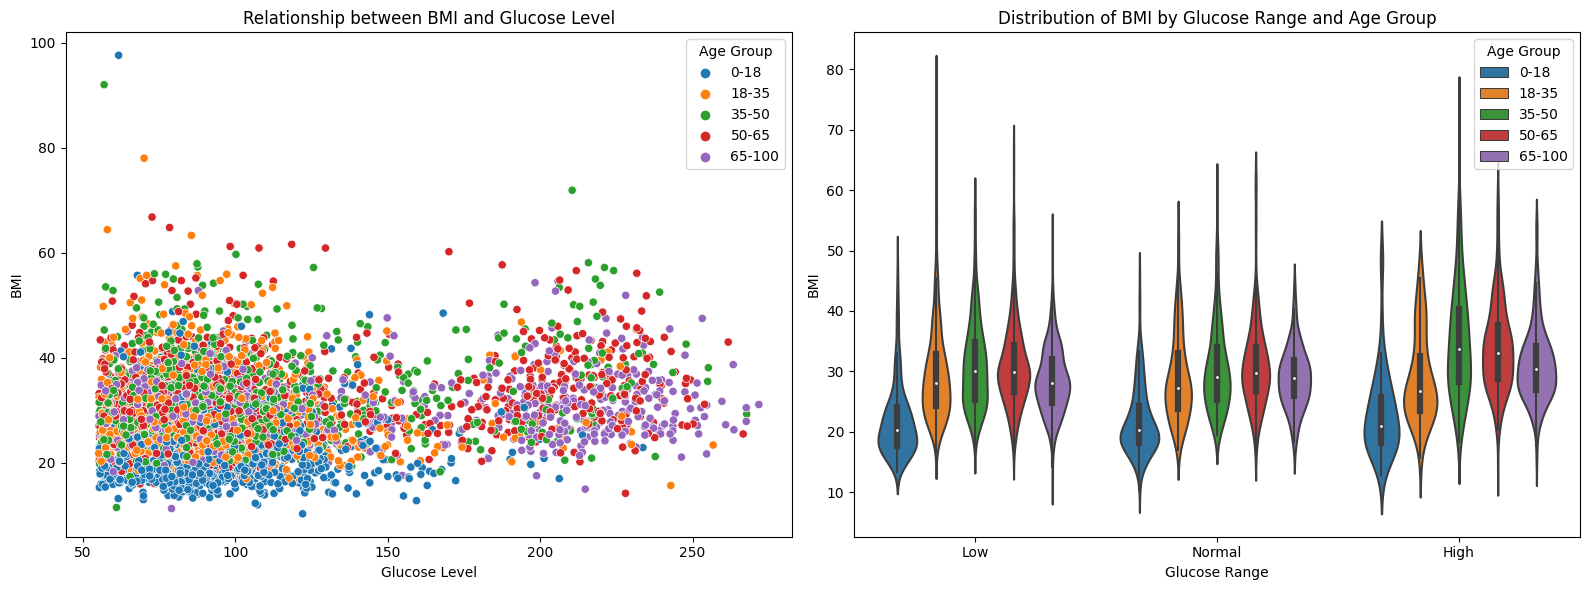

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot: Relationship between BMI and Glucose Level
sns.scatterplot(data=df, x='avg_glucose_level', y='bmi', hue='age_group_category', ax=ax[0])
ax[0].set_xlabel('Glucose Level')
ax[0].set_ylabel('BMI')
ax[0].set_title('Relationship between BMI and Glucose Level')

# Violin plot: Distribution of BMI by Glucose Range and Age Group
sns.violinplot(data=df, x='glucose_range', y='bmi', hue='age_group_category', ax=ax[1])
ax[1].set_xlabel('Glucose Range')
ax[1].set_ylabel('BMI')
ax[1].set_title('Distribution of BMI by Glucose Range and Age Group')

# Add a legend
ax[0].legend(title='Age Group')
ax[1].legend(title='Age Group')

plt.tight_layout()
plt.show()



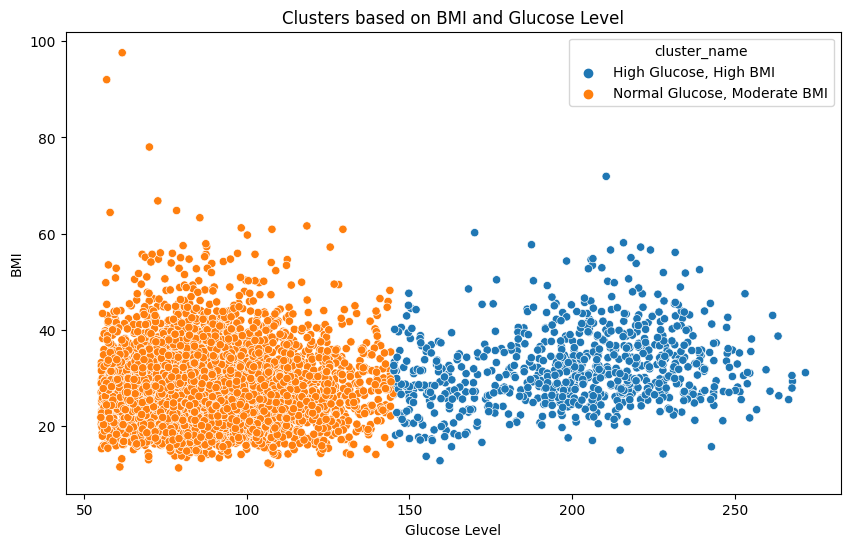

In [68]:
from sklearn.cluster import KMeans
fig, ax = plt.subplots(figsize=(10, 6))

X = df[['bmi', 'avg_glucose_level']]

# Define the number of clusters
n_clusters = 2

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

cluster_labels = kmeans.labels_
df['cluster'] = cluster_labels

# Assign names to the clusters
cluster_names = ['Normal Glucose, Moderate BMI', 'High Glucose, High BMI']
df['cluster_name'] = df['cluster'].map({0: cluster_names[0], 1: cluster_names[1]})

# Plot the scatterplot with cluster coloring and cluster names
sns.scatterplot(data=df, x='avg_glucose_level', y='bmi', hue='cluster_name')
plt.xlabel('Glucose Level')
plt.ylabel('BMI')
plt.title('Clusters based on BMI and Glucose Level')
plt.show()

There are two distinct groups of patients based on their BMI and average glucose level. One group has a BMI range of 18-40 and glucose levels below 140mg/dl, while the other group has a BMI range of 25-45 and glucose levels around 180-250mg/dl. Patients with higher glucose levels tend to have higher BMIs.

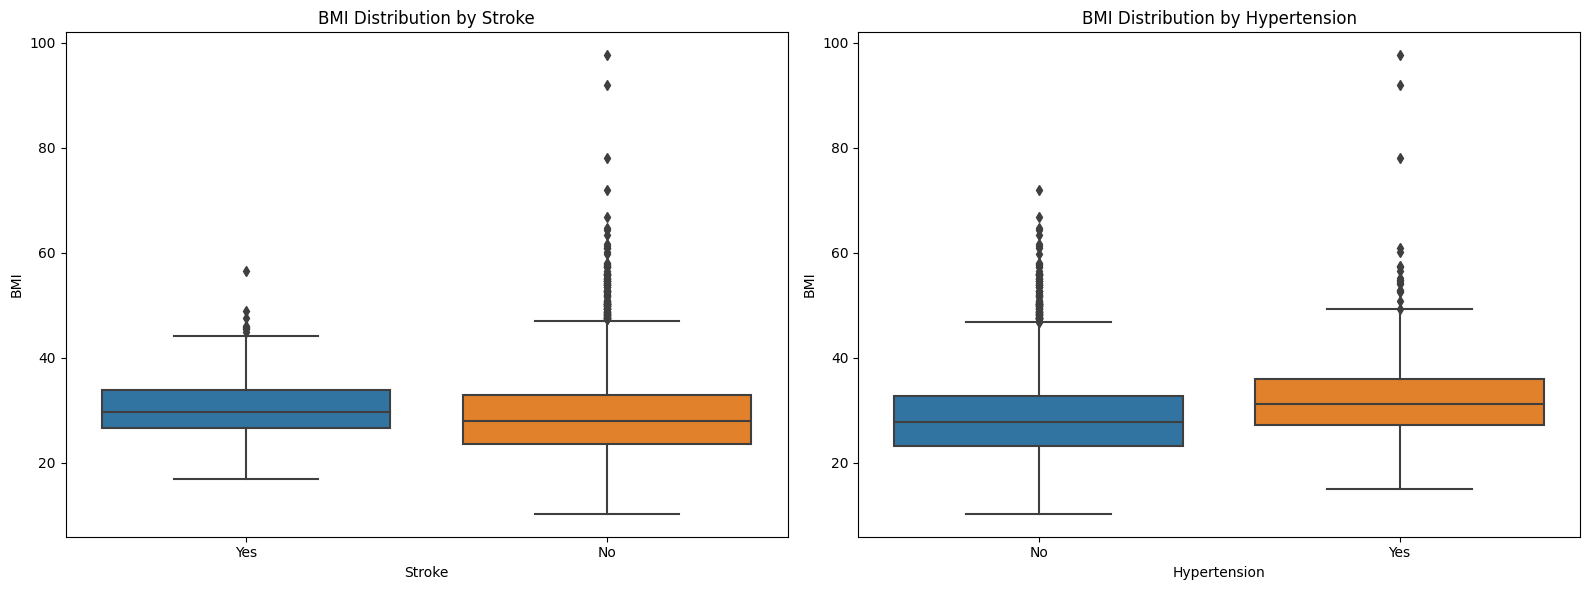

In [69]:
 # Replace stroke labels with "Yes" and "No"
df['stroke'] = df['stroke'].replace({0: 'No', 1: 'Yes'})

# Replace hypertension labels with "Yes" and "No"
df['hypertension'] = df['hypertension'].replace({0: 'No', 1: 'Yes'})

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_boxplot(ax[0], 'stroke', 'bmi', None, df)
plot_boxplot(ax[1], 'hypertension', 'bmi', None, df)

ax[0].set_xlabel('Stroke')
ax[0].set_ylabel('BMI')
ax[0].set_title('BMI Distribution by Stroke')

ax[1].set_xlabel('Hypertension')
ax[1].set_ylabel('BMI')
ax[1].set_title('BMI Distribution by Hypertension')

plt.tight_layout()
plt.show()

Patients with a history of stroke (Yes) tend to have a slightly higher median BMI compared to those without a history of stroke (No).

There are some outliers present in both groups, particularly among patients without stroke.

These findings indicate a potential relationship between BMI and the presence of stroke or hypertension. It suggests that individuals with a history of stroke or hypertension tend to have higher BMIs on average.

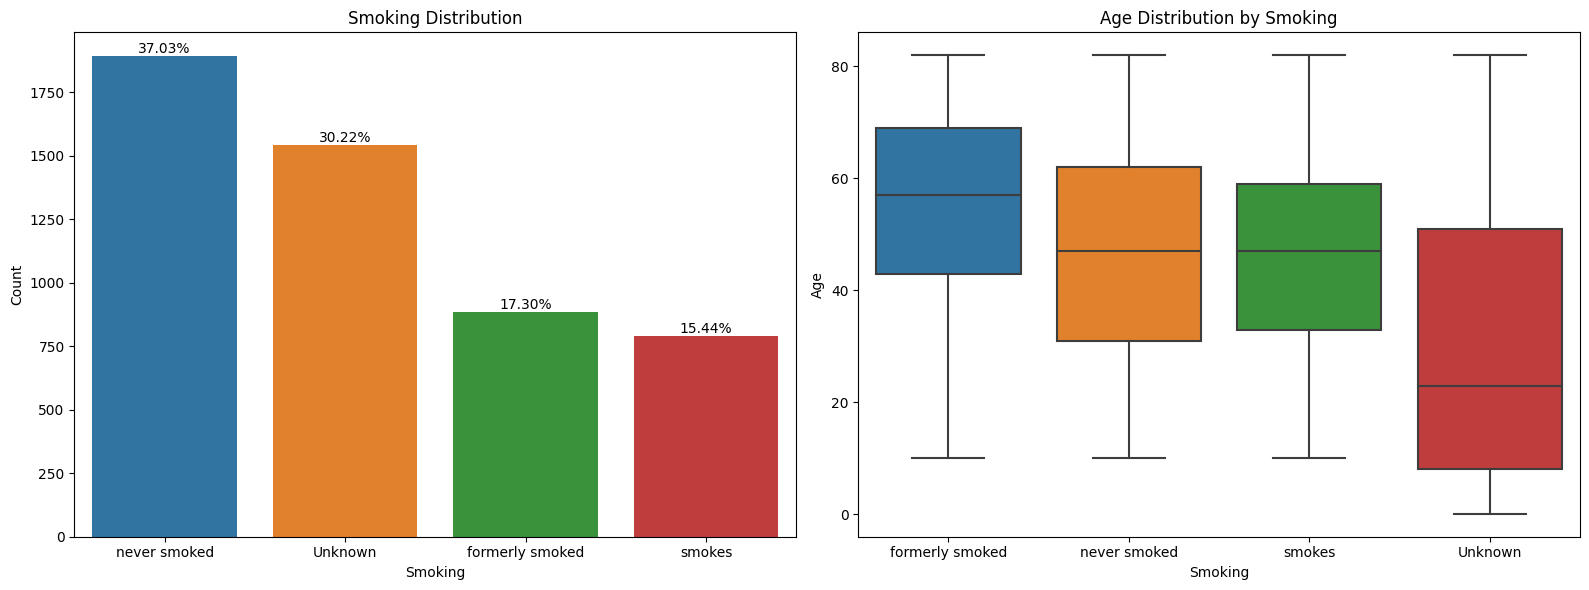

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Smoking distribution
smoking_counts = df['smoking_status'].value_counts()
plot_countplot_with_percentage(data=df, x='smoking_status', hue=None, ax=ax[0])
ax[0].set_xlabel('Smoking')
ax[0].set_ylabel('Count')
ax[0].set_title('Smoking Distribution')


# Age and Smoking relationship
plot_boxplot(ax[1], 'smoking_status', 'age', None, df)
ax[1].set_xlabel('Smoking')
ax[1].set_ylabel('Age')
ax[1].set_title('Age Distribution by Smoking')

plt.tight_layout()
plt.show()



Mostly patients in the dataset have never smoked before. The combined proportion of former and current smokers is slightly higher than 32%, which is not significantly different from the proportion of non-smokers.

When examining the distribution of smoking status by age, it can be observed that the average age of patients who never smoked and those who currently smoke is quite similar, around 45 years old. However, patients who have quit smoking tend to belong to an older age group, with a mean age of approximately 55 years old.

Interestingly, it appears that smoking status was not recorded or determined for the younger age group, which primarily consists of children, adolescents, and young adults, as the median age for this group is around 20 years old.

In [71]:
def plot_smokers_with_stroke_and_hypertension(data):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    # Smokers with Stroke
    plot_countplot_with_percentage(df, 'stroke', 'smoking_status',ax[0])

    # Smokers with Hypertension
    plot_countplot_with_percentage(df, 'hypertension', 'smoking_status', ax[1])

    plt.tight_layout()
    plt.show()




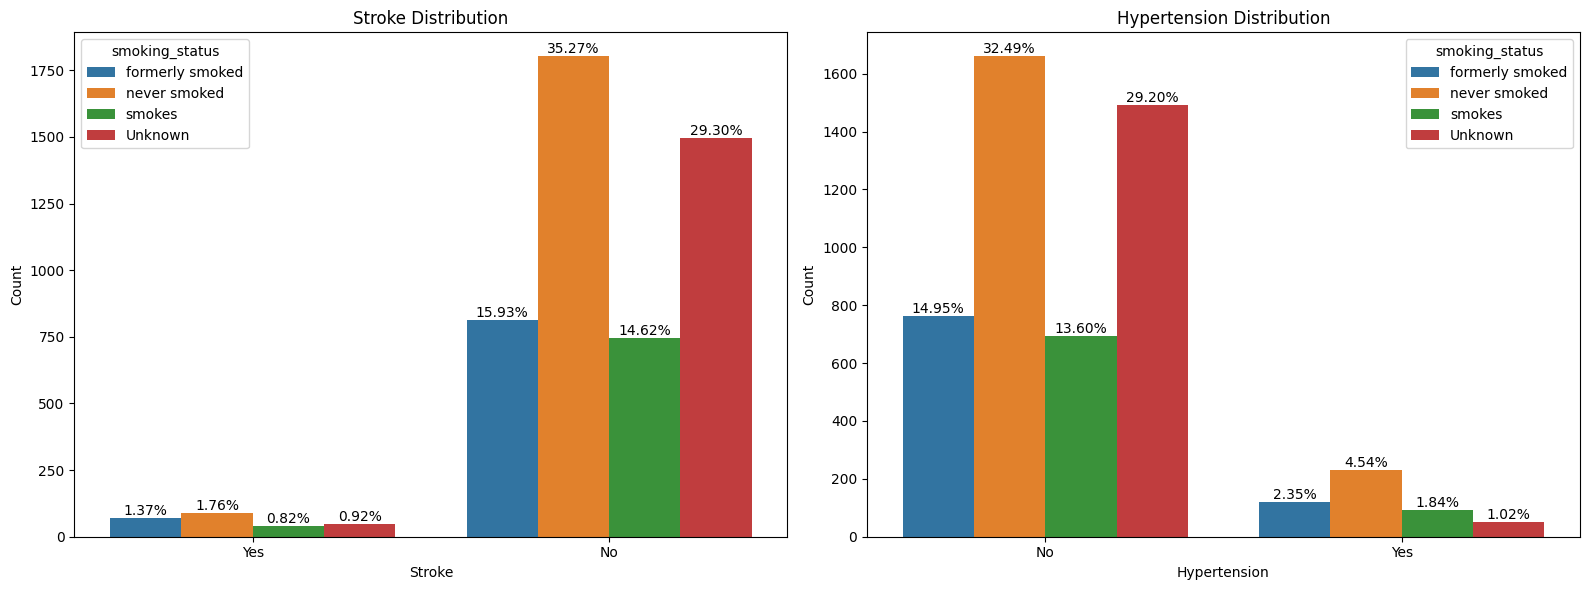

In [72]:
plot_smokers_with_stroke_and_hypertension(df)


## **Statistical Testing**

In [73]:
from scipy.stats import chi2_contingency

def perform_hypothesis_test(observed_values, significance_level):
    # Perform the chi-square test
    chi2_stat, p_value, dof, expected_values = chi2_contingency(observed_values)

    # Print the test results
    print("Hypothesis Test Results:")
    print("\nChi-square statistic:", chi2_stat)
    print("Degrees of freedom:", dof)
    print("p-value:", p_value)

    # Compare the p-value with the significance level
    if p_value < significance_level:
        print("\nReject the Null Hypothesis")
        print("There is sufficient evidence to support the Alternative Hypothesis")
    else:
        print("\nFail to reject the Null Hypothesis")
        print("There is not enough evidence to support the Alternative Hypothesis")


In [74]:
def perform_ttest(significance_level, group1, group2):
    # Perform the two-sample t-test
    t_stat, p_value = ttest_ind(group1, group2)

    # Print the test results
    print("Hypothesis Test Results:")
    print("\nt-statistic:", t_stat)
    print("p-value:", p_value)

    # Compare the p-value with the significance level
    if p_value < significance_level:
        print("\nReject the Null Hypothesis")
        print("There is sufficient evidence to support the Alternative Hypothesis")
    else:
        print("\nFail to reject the Null Hypothesis")
        print("There is not enough evidence to support the Alternative Hypothesis")


**Test 1**

In [75]:
null_hypothesis = "There is no difference in the proportion of individuals having a stroke between males and females."
alternative_hypothesis = "There is a difference in the proportion of individuals having a stroke between males and females."
significance_level = 0.05
cont_table = pd.crosstab(df['gender'], df['stroke'])


In [76]:
perform_hypothesis_test(cont_table, significance_level)

Hypothesis Test Results:

Chi-square statistic: 0.340002536046177
Degrees of freedom: 1
p-value: 0.5598277580669416

Fail to reject the Null Hypothesis
There is not enough evidence to support the Alternative Hypothesis


**Test 2**

In [77]:
null_hypothesis = "There is no significant difference in the average age between males and females who suffer from strokes."
alternative_hypothesis = "There is a significant difference in the average age between males and females who suffer from strokes."
significance_level = 0.05


In [78]:
males_age = df.loc[(df['gender'] == 'Male') & (df['stroke'] == 'Yes'), 'age']
females_age = df.loc[(df['gender'] == 'Female') & (df['stroke'] == 'Yes'), 'age']

perform_ttest(significance_level, males_age, females_age)

Hypothesis Test Results:

t-statistic: 0.8369665384357804
p-value: 0.4034204213646392

Fail to reject the Null Hypothesis
There is not enough evidence to support the Alternative Hypothesis


**Test 3**

In [79]:
null_hypothesis = "The proportion of patients who have hypertension and experienced a stroke is the same as the proportion of patients who don't have hypertension and have suffered a stroke."
alternative_hypothesis = "The proportion of patients who have hypertension and experienced a stroke is different from the proportion of patients who don't have hypertension and have suffered a stroke."
significance_level = 0.05

In [80]:
cont_table = pd.crosstab(df['hypertension'], df['stroke'])
print(cont_table)


stroke          No  Yes
hypertension           
No            4428  183
Yes            432   66


In [81]:
perform_hypothesis_test(cont_table, significance_level)

Hypothesis Test Results:

Chi-square statistic: 81.57314462043591
Degrees of freedom: 1
p-value: 1.688936253410575e-19

Reject the Null Hypothesis
There is sufficient evidence to support the Alternative Hypothesis


**Test 4**

In [82]:
null_hypothesis = "There is no difference in the proportion of patients with stroke/hypertension who have a heart disease compared to those who don't have a heart disease."
alternative_hypothesis = "There is a difference in the proportion of patients with stroke/hypertension who have a heart disease compared to those who don't have a heart disease."
significance_level = 0.05

In [83]:
cont_table1 = pd.crosstab(df['stroke'], df['heart_disease'])
print(cont_table1)


heart_disease     0    1
stroke                  
No             4631  229
Yes             202   47


In [84]:
cont_table2 = pd.crosstab(df['stroke'], df['hypertension'])
cont_table2

hypertension,No,Yes
stroke,,
No,4428,432
Yes,183,66


In [85]:
print("Heart disease")
perform_hypothesis_test(cont_table1, significance_level)
print("\n")

print("Hypertension")
perform_hypothesis_test(cont_table2, significance_level)

Heart disease
Hypothesis Test Results:

Chi-square statistic: 90.22943664078221
Degrees of freedom: 1
p-value: 2.120831133146208e-21

Reject the Null Hypothesis
There is sufficient evidence to support the Alternative Hypothesis


Hypertension
Hypothesis Test Results:

Chi-square statistic: 81.57314462043591
Degrees of freedom: 1
p-value: 1.688936253410575e-19

Reject the Null Hypothesis
There is sufficient evidence to support the Alternative Hypothesis


These findings suggest that both heart disease and hypertension are significantly associated with stroke/hypertension.

**Test 5**

In [86]:
null_hypothesis = ": The proportion of patients with stroke/hypertension working in the government sector is the same as the proportion of patients working in the private sector."
alternative_hypothesis = "The proportion of patients with stroke/hypertension working in the government sector is different from the proportion of patients working in the private sector."
significance_level = 0.05

In [87]:
cont_table = pd.crosstab(index=[df['stroke'], df['hypertension']], columns=df['work_type'])
cont_table = cont_table.loc[:, ['Govt_job', 'Private']]

cont_table


work_type            Govt_job  Private
stroke hypertension                   
No     No                 559     2527
       Yes                 65      248
Yes    No                  25      116
       Yes                  8       33

In [88]:
perform_hypothesis_test(cont_table, significance_level)


Hypothesis Test Results:

Chi-square statistic: 1.4080784036915974
Degrees of freedom: 3
p-value: 0.7036422057883613

Fail to reject the Null Hypothesis
There is not enough evidence to support the Alternative Hypothesis


We do not find a significant difference in the proportion of patients with stroke and hypertension based on their work type (government or private). Other factors might have a stronger influence on the occurrence of stroke and hypertension.

**Test 6**

In [89]:
null_hypothesis = "There is no significant difference in the average glucose levels between patients with and without a stroke."
alternative_hypothesis = "There is a significant difference in the average glucose levels between patients with and without a stroke."
significance_level = 0.05

In [90]:
glucose_stroke = df.loc[df['stroke'] == 'Yes', 'avg_glucose_level']
glucose_no_stroke = df.loc[df['stroke'] == 'No', 'avg_glucose_level']

In [91]:
perform_ttest(significance_level, glucose_stroke, glucose_no_stroke)


Hypothesis Test Results:

t-statistic: 9.515777715338581
p-value: 2.705302697167301e-21

Reject the Null Hypothesis
There is sufficient evidence to support the Alternative Hypothesis


The t-test results indicate a significant difference in the average glucose levels between patients with and without a stroke. The t-statistic value oindicates a large difference between the means of the two groups. The p-value is much smaller than the significance level of 0.05, providing strong evidence against the null hypothesis. Therefore, we can conclude that there is a significant difference in the average glucose levels between patients with and without a stroke.

**Test 7**

In [92]:
null_hypothesis = "There is no significant difference in the average BMI between patients with and without stroke."
alternative_hypothesis = "There is a significant difference in the average BMI between patients with and without stroke."
significance_level = 0.05

In [93]:
bmi_stroke = df.loc[df['stroke'] == "Yes", 'bmi']
bmi_no_stroke = df.loc[df['stroke'] == "No", 'bmi']

In [94]:
perform_ttest(significance_level, bmi_stroke, bmi_no_stroke)


Hypothesis Test Results:

t-statistic: 3.3852106099658523
p-value: 0.0007165992505738678

Reject the Null Hypothesis
There is sufficient evidence to support the Alternative Hypothesis


This finding suggests that BMI may play a role in the occurrence of strokes. The average BMI of patients with stroke is significantly different from the average BMI of patients without stroke. This information can be valuable for further research and interventions related to stroke prevention and management, particularly in terms of monitoring and managing BMI levels to reduce the risk of stroke.

## **Correlation**

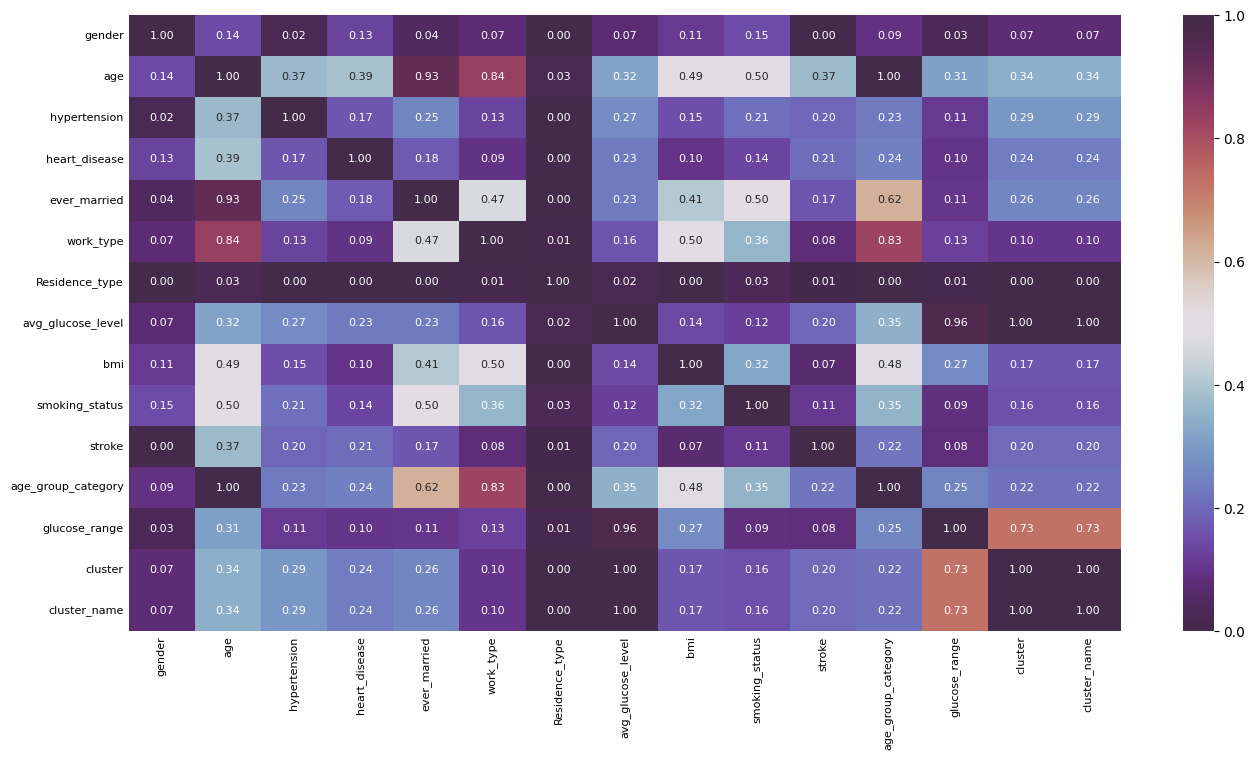

In [95]:
interval_cols = df[["age", "avg_glucose_level", "bmi"]]
plt.figure(figsize=(16, 8))
corr_matrix = df.phik_matrix(interval_cols=interval_cols)

ax = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="twilight_shifted",
    annot_kws={"fontsize": 8},
    alpha=0.9,
)
ax.tick_params(axis="both", which="both", length=0)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

In [96]:
corr_matrix

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group_category,glucose_range,cluster,cluster_name
gender,1.000000,0.144521,0.023651,0.131024,0.041239,0.070806,0.000000,0.070991,0.110549,0.148648,0.000000,0.090325,0.034371,0.073251,0.073251
age,0.144521,1.000000,0.368726,0.388481,0.927306,0.837876,0.025205,0.317145,0.486554,0.500707,0.371747,0.997519,0.310856,0.344461,0.344461
hypertension,0.023651,0.368726,1.000000,0.165618,0.253116,0.131047,0.000000,0.269534,0.154294,0.211829,0.196007,0.232454,0.111028,0.290884,0.290884
heart_disease,0.131024,0.388481,0.165618,1.000000,0.176318,0.093419,0.000000,0.232810,0.097084,0.136445,0.206123,0.243558,0.099195,0.238947,0.238947
ever_married,0.041239,0.927306,0.253116,0.176318,1.000000,0.466517,0.000000,0.233356,0.407691,0.503934,0.166414,0.617177,0.105441,0.257950,0.257950
work_type,0.070806,0.837876,0.131047,0.093419,0.466517,1.000000,0.009017,0.163556,0.498733,0.358792,0.076867,0.825875,0.125798,0.101158,0.101158
Residence_type,0.000000,0.025205,0.000000,0.000000,0.000000,0.009017,1.000000,0.022223,0.000000,0.032999,0.006018,0.000000,0.014791,0.000000,0.000000
avg_glucose_level,0.070991,0.317145,0.269534,0.232810,0.233356,0.163556,0.022223,1.000000,0.139422,0.124283,0.195030,0.347170,0.962600,0.999546,0.999546
bmi,0.110549,0.486554,0.154294,0.097084,0.407691,0.498733,0.000000,0.139422,1.000000,0.321187,0.065636,0.480618,0.268362,0.166080,0.166080
smoking_status,0.148648,0.500707,0.211829,0.136445,0.503934,0.358792,0.032999,0.124283,0.321187,1.000000,0.108202,0.354362,0.086240,0.155644,0.155644


Gender has a weak positive correlation (0.145) with age, indicating that older individuals tend to have a slightly higher proportion of males.

Age shows a strong positive correlation (0.928) with ever_married, suggesting that older individuals are more likely to be married.

Age has a moderate positive correlation (0.837) with work_type, indicating that certain work types are more prevalent among older individuals.

Average glucose level demonstrates a strong positive correlation (0.963) with bmi, indicating a relationship between higher glucose levels and higher body mass index.

Smoking status shows a moderate positive correlation (0.501) with ever_married, suggesting that married individuals are more likely to be smokers.

Stroke has a weak positive correlation (0.222) with age_group_category, indicating that certain age groups may be more prone to strokes.

Glucose range exhibits a strong positive correlation (0.728) with cluster and cluster_name, suggesting that these variables are closely related to the glucose range.


Based on the correlation matrix, we can analyze the effects of various features on stroke:

Age: Age shows a moderate positive correlation (0.372) with stroke. This suggests that older individuals may have a higher likelihood of experiencing a stroke.

Hypertension: Hypertension (high blood pressure) has a positive correlation (0.196) with stroke. This indicates that individuals with hypertension may be at an increased risk of having a stroke.

Heart Disease: Heart disease also shows a positive correlation (0.206) with stroke. This implies that individuals with pre-existing heart conditions may have a higher probability of experiencing a stroke.

Average Glucose Level: Average glucose level has a positive correlation (0.195) with stroke. This suggests that higher glucose levels in the blood may be associated with an increased risk of stroke.

BMI: BMI (Body Mass Index) demonstrates a weak positive correlation (0.065) with stroke. This implies that higher BMI values may have a slight influence on stroke risk.

Smoking Status: Smoking status has a weak positive correlation (0.108) with stroke. This indicates that smokers may be more prone to experiencing a stroke.

# **Modelling**

## **Preprocessing**

In [97]:
df = df.drop(columns=['age_group_category', 'glucose_range', 'cluster', 'cluster_name'])


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   object 
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 479.0+ KB


In [99]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,No,1,Yes,Private,Urban,228.69,36.60,formerly smoked,Yes
51676,Female,61.0,No,0,Yes,Self-employed,Rural,202.21,34.55,never smoked,Yes
31112,Male,80.0,No,1,Yes,Private,Rural,105.92,32.50,never smoked,Yes
60182,Female,49.0,No,0,Yes,Private,Urban,171.23,34.40,smokes,Yes
1665,Female,79.0,Yes,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,Yes


In [100]:
#map the categorical variables to numeric values
gender_mapping = {'Male': 0, 'Female': 1}
hypertension_mapping = {'No': 0, 'Yes': 1}
ever_married_mapping = {'No': 0, 'Yes': 1}
stroke_mapping = {'No': 0, 'Yes': 1}
Residence_type= {'Urban': 0, 'Rural': 1}


df['gender'] = df['gender'].map(gender_mapping)
df['hypertension'] = df['hypertension'].map(hypertension_mapping)
df['ever_married'] = df['ever_married'].map(ever_married_mapping)
df['stroke'] = df['stroke'].map(stroke_mapping)
df["Residence_type"]=df["Residence_type"].map(Residence_type)

In [101]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [102]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,0,67.0,0,1,1,Private,0,228.69,36.60,formerly smoked,1
51676,1,61.0,0,0,1,Self-employed,1,202.21,34.55,never smoked,1
31112,0,80.0,0,1,1,Private,1,105.92,32.50,never smoked,1
60182,1,49.0,0,0,1,Private,0,171.23,34.40,smokes,1
1665,1,79.0,1,0,1,Self-employed,1,174.12,24.00,never smoked,1


In [103]:
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [104]:
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [105]:
# Encoding
# Perform one-hot encoding for "work_type" and "smoking_status" columns
work_type_encoded = pd.get_dummies(df["work_type"], prefix="work_type")
smoking_status_encoded = pd.get_dummies(df["smoking_status"], prefix="smoking_status")

df = pd.concat([df, work_type_encoded, smoking_status_encoded], axis=1)
df.drop(["work_type", "smoking_status"], axis=1, inplace=True)


In [106]:
pd.set_option('display.max_columns', None)
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,
9046,0,67.0,0,1,1,0,228.69,36.60,1,0,0,1,0,0,0,1,0,0
51676,1,61.0,0,0,1,1,202.21,34.55,1,0,0,0,1,0,0,0,1,0
31112,0,80.0,0,1,1,1,105.92,32.50,1,0,0,1,0,0,0,0,1,0
60182,1,49.0,0,0,1,0,171.23,34.40,1,0,0,1,0,0,0,0,0,1
1665,1,79.0,1,0,1,1,174.12,24.00,1,0,0,0,1,0,0,0,1,0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 9046 to 44679
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5109 non-null   int64  
 1   age                             5109 non-null   float64
 2   hypertension                    5109 non-null   int64  
 3   heart_disease                   5109 non-null   int64  
 4   ever_married                    5109 non-null   int64  
 5   Residence_type                  5109 non-null   int64  
 6   avg_glucose_level               5109 non-null   float64
 7   bmi                             5109 non-null   float64
 8   stroke                          5109 non-null   int64  
 9   work_type_Govt_job              5109 non-null   uint8  
 10  work_type_Never_worked          5109 non-null   uint8  
 11  work_type_Private               5109 non-null   uint8  
 12  work_type_Self-employed       

In [108]:
#let's check whether the dataset is balanced or not
class_counts = df['stroke'].value_counts()
print(class_counts)


0    4860
1     249
Name: stroke, dtype: int64


 The data is imbalanced as the count of the positive class (1) is much smaller than the count of the negative class (0). Imbalanced data can potentially lead to biased models

In [109]:
target_variable = df['stroke']  # Extract the target variable
df.drop('stroke', axis=1, inplace=True)  # Remove the target variable from the DataFrame
df['stroke'] = target_variable  # Add the target variable at the last column

# Verify the updated DataFrame with the target variable at the last column
print(df.columns)


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes', 'stroke'],
      dtype='object')


**SMOTE:**

Creating new synthetic samples for the minority class using techniques such as SMOTE (Synthetic Minority Over-sampling Technique)

In [110]:
#let's find out best 5 features for this dataset
X = df.drop("stroke", axis=1)
y = df["stroke"]

In [111]:
# Selecting top 5 features
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

In [112]:
# Get the selected feature names
feature_names = X.columns[selector.get_support()]

In [113]:
# Print the selected feature names
print(feature_names)

Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level'],
      dtype='object')


Summary:

These are the first 5 best features accroding to the selectkbest, but our datafrane is small , I am using all the features

In [114]:
# now let's create a SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())

1    4860
0    4860
Name: stroke, dtype: int64


In [115]:
#train_test_split()

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7776, 17)
Shape of y_train: (7776,)
Shape of X_test: (1944, 17)
Shape of y_test: (1944,)


In [116]:
# standardization

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)


X_train_df.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,7.776000e+03,7.776000e+03,7.776000e+03,7.776000e+03,7.776000e+03,7.776000e+03,7.776000e+03,7.776000e+03,7.776000e+03,7.776000e+03,7.776000e+03,7.776000e+03,7.776000e+03,7.776000e+03,7.776000e+03,7.776000e+03,7.776000e+03
mean,2.078813e-17,-7.310110e-17,-2.284410e-17,-4.340378e-17,-8.863509e-17,-6.396347e-18,1.827528e-16,-3.837808e-16,-1.005140e-17,-5.482583e-18,-6.396347e-17,-9.594520e-18,-2.193033e-17,6.944605e-17,6.304970e-17,3.792120e-17,3.472302e-17
std,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00
min,-9.177241e-01,-2.486146e+00,-3.010035e-01,-2.380448e-01,-1.606785e+00,-7.480420e-01,-1.160746e+00,-2.849975e+00,-2.857491e-01,-4.540766e-02,-9.631279e-01,-3.752933e-01,-2.769658e-01,-4.661356e-01,-3.792965e-01,-5.995336e-01,-3.288858e-01
25%,-9.177241e-01,-6.036800e-01,-3.010035e-01,-2.380448e-01,-1.606785e+00,-7.480420e-01,-7.356947e-01,-6.408132e-01,-2.857491e-01,-4.540766e-02,-9.631279e-01,-3.752933e-01,-2.769658e-01,-4.661356e-01,-3.792965e-01,-5.995336e-01,-3.288858e-01
50%,-9.177241e-01,1.826002e-01,-3.010035e-01,-2.380448e-01,6.223606e-01,-7.480420e-01,-4.022970e-01,-9.158067e-02,-2.857491e-01,-4.540766e-02,-9.631279e-01,-3.752933e-01,-2.769658e-01,-4.661356e-01,-3.792965e-01,-5.995336e-01,-3.288858e-01
75%,1.089652e+00,8.912200e-01,-3.010035e-01,-2.380448e-01,6.223606e-01,1.336823e+00,5.604949e-01,5.353469e-01,-2.857491e-01,-4.540766e-02,1.038284e+00,-3.752933e-01,-2.769658e-01,-4.661356e-01,-3.792965e-01,1.667963e+00,-3.288858e-01
max,1.089652e+00,1.206777e+00,3.322221e+00,4.200891e+00,6.223606e-01,1.336823e+00,2.772637e+00,9.175277e+00,3.499574e+00,2.202272e+01,1.038284e+00,2.664583e+00,3.610554e+00,2.145298e+00,2.636460e+00,1.667963e+00,3.040569e+00


Observation:


The mean of each column is very close to 0 and the standard deviation of each column is very close to 1 (around 1.0). This is a typical result after applying standard scaling.

**Pipelines:**

In [118]:
from sklearn.metrics import accuracy_score, classification_report

def run_classification_models(classifiers, X_train, y_train, X_test, y_test):
    for name, classifier in classifiers:
        print(f"Running {name}...")
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {round(accuracy, 2)}\n")

        report = classification_report(y_test, y_pred)
        print('Classification report:\n')
        print(report)
        print('-' * 50)


In [119]:
classifiers_stroke = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("KNN", KNeighborsClassifier()),
    ("Decicion Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    (
        "XGBoost",
        xgb.XGBClassifier(
            objective="reg:logistic",
            use_label_encoder=False,
        ),
    ),
    ("Light GBM", lgb.LGBMClassifier(verbosity=-1))
]

run_classification_models(classifiers_stroke, X_train, y_train, X_test, y_test)


Running Logistic Regression...
Accuracy: 0.93

Classification report:

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       976
           1       0.97      0.90      0.93       968

    accuracy                           0.93      1944
   macro avg       0.94      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

--------------------------------------------------
Running KNN...
Accuracy: 0.95

Classification report:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       976
           1       0.95      0.95      0.95       968

    accuracy                           0.95      1944
   macro avg       0.95      0.95      0.95      1944
weighted avg       0.95      0.95      0.95      1944

--------------------------------------------------
Running Decicion Tree...
Accuracy: 0.94

Classification report:

              precision    recall  f1-score   support

Based on the classification models, here are some insights:

Logistic Regression achieved an accuracy of 0.93. It showed balanced precision and recall scores for both classes, indicating good performance in predicting strokes.

KNN achieved an accuracy of 0.95, showing high precision, recall, and F1-score for both classes. This model performed well in predicting strokes with similar accuracy for both positive and negative cases.

Decision Tree achieved an accuracy of 0.94. It demonstrated good precision, recall, and F1-score for both classes. This model effectively captured the patterns in the data.

Random Forest achieved an accuracy of 0.97, showing high precision, recall, and F1-score for both classes. It performed exceptionally well, indicating strong predictive power in identifying strokes.

XGBoost achieved an accuracy of 0.97, showing high precision, recall, and F1-score for both classes. This model also performed exceptionally well and is capable of capturing complex relationships within the data.

Light GBM achieved an accuracy of 0.96, demonstrating high precision, recall, and F1-score for both classes. It performed well and provided reliable predictions for strokes.

Overall, the Random Forest, XGBoost, and Light GBM models achieved the highest accuracy scores, indicating their effectiveness in predicting strokes. These models also displayed high precision, recall, and F1-score, suggesting their ability to accurately identify both positive and negative cases of strokes. It is recommended to further evaluate and compare these models in terms of computational efficiency and deployment considerations to determine the most suitable model for the given task.






**KNN**

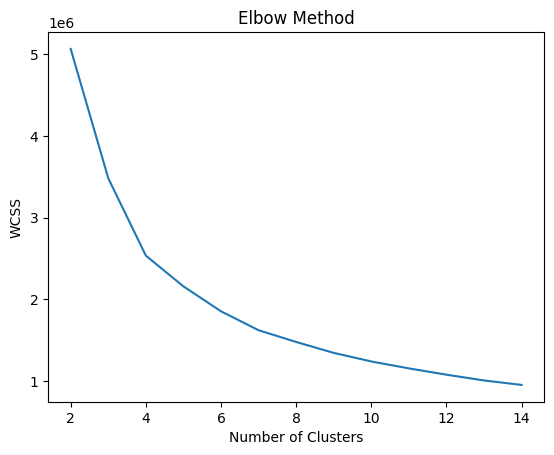

In [120]:
from sklearn.cluster import KMeans

wcss = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 15), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [121]:
kmeans = KMeans(n_clusters=7, random_state=42)

kmeans.fit(X)
cluster_labels = kmeans.labels_
df['cluster'] = cluster_labels

In [122]:
X_clustered = df.drop(['cluster'], axis=1)
y_clustered = df['cluster']


# Initialize and fit the KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict using the KNN classifier
y_pred = knn.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy, 2)}\n")

report = classification_report(y_test, y_pred)
print('Classification report:\n')
print(report)

Accuracy: 0.95

Classification report:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       976
           1       0.95      0.95      0.95       968

    accuracy                           0.95      1944
   macro avg       0.95      0.95      0.95      1944
weighted avg       0.95      0.95      0.95      1944



Observation:

In summary, the KNN classifier exhibited consistent performance with an accuracy score of 0.9 both before and after incorporating 7 clusters.

**K-fold cross validation**

let's apply cross validation and see the performance of the models.

In [123]:
kfold = KFold(n_splits=7)
accuracy_scores = []
classifiers = [
    "Linear SVM",
    "Radial SVM",
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "KNN",
    "XGBoost",
    "Light GBM"
]
models = [
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    KNeighborsClassifier(n_neighbors=8),
    xgb.XGBClassifier(objective="reg:logistic", use_label_encoder=False),
    lgb.LGBMClassifier(verbosity=-1)
]

for model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    accuracy_scores.append(cv_results)

model_performance = pd.DataFrame(accuracy_scores, index=classifiers).T
model_performance

,Linear SVM,Radial SVM,Logistic Regression,Decision Tree,Random Forest,KNN,XGBoost,Light GBM
0,0.927093,0.939694,0.924392,0.936994,0.973897,0.932493,0.963096,0.965797
1,0.919892,0.935194,0.920792,0.944194,0.964896,0.936994,0.968497,0.969397
2,0.930693,0.942394,0.927093,0.939694,0.969397,0.942394,0.956796,0.959496
3,0.927093,0.944194,0.927093,0.936094,0.968497,0.939694,0.963996,0.964896
4,0.917192,0.937894,0.908191,0.941494,0.969397,0.936994,0.968497,0.964896
5,0.939694,0.948695,0.932493,0.934293,0.973897,0.943294,0.961296,0.966697
6,0.944144,0.946847,0.937838,0.961261,0.975676,0.949550,0.972973,0.971171


Observation:

The Decision Tree, Random Forest, and KNN models show relatively better performance in terms of accuracy across the different folds.

Linear SVM and Logistic Regression models seem to have lower accuracy scores compared to the other models.

These results suggest that the Decision Tree, Random Forest, and KNN models might be promising options for this classification task, considering their relatively higher accuracy scores in the cross-validation evaluation.

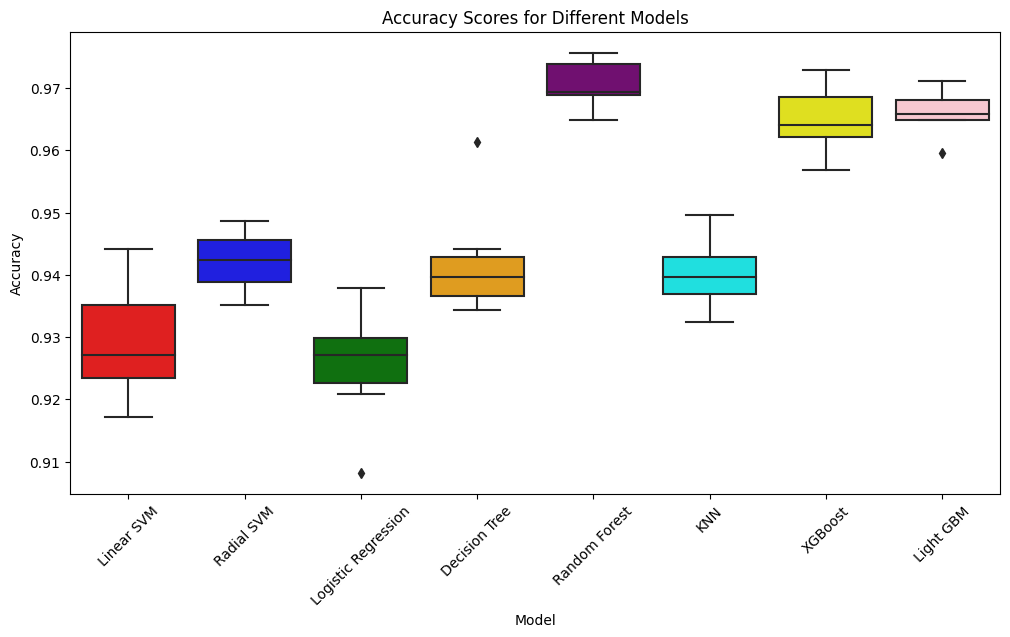

In [124]:
plt.subplots(figsize=(12, 6))
model_performance = pd.DataFrame(accuracy_scores, index=classifiers).T

colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'yellow', 'pink']
sns.boxplot(data=model_performance, palette=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Models')
plt.xticks(rotation=45)
plt.show()


In [125]:
# let's compare accuracy and ROC_AUC
model_performance = pd.DataFrame(index=classifiers, columns=['Accuracy', 'ROC AUC'])

for model, clf_name in zip(models, classifiers):
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    roc_auc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    model_performance.loc[clf_name, 'Accuracy'] = np.mean(cv_results)
    model_performance.loc[clf_name, 'ROC AUC'] = np.mean(roc_auc_results)
model_performance

,Accuracy,ROC AUC
Linear SVM,0.9294,0.976876
Radial SVM,0.94213,0.980146
Logistic Regression,0.925413,0.978639
Decision Tree,0.943546,0.942205
Random Forest,0.970551,0.994141
KNN,0.940202,0.98046
XGBoost,0.965022,0.99226
Light GBM,0.96605,0.992563


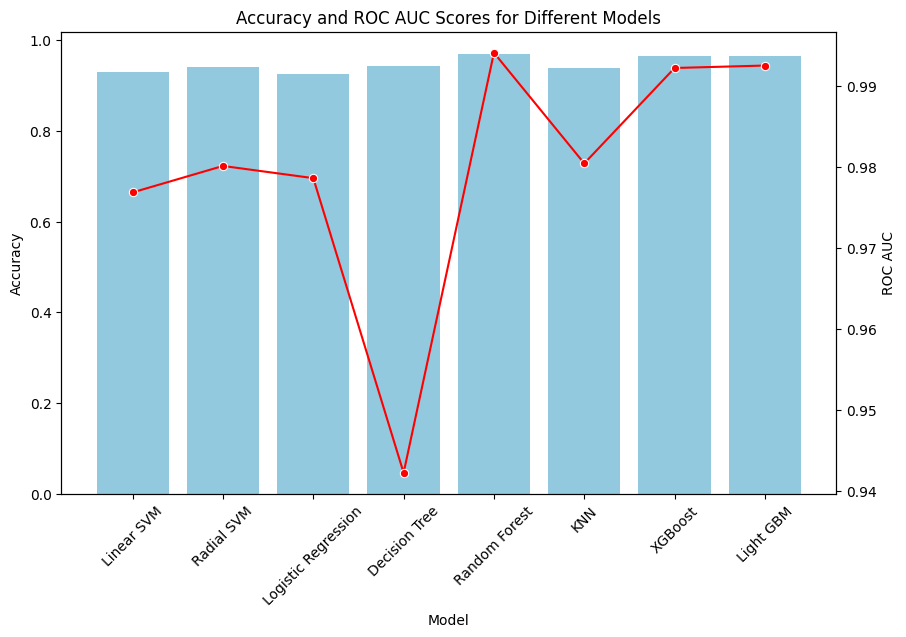

In [126]:
#let's plot it
plt.figure(figsize=(10, 6))
sns.barplot(x=model_performance.index, y=model_performance['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy and ROC AUC Scores for Different Models')
plt.xticks(rotation=45)

plt.twinx()
sns.lineplot(x=model_performance.index, y=model_performance['ROC AUC'], color='red', marker='o')
plt.ylabel('ROC AUC')

plt.show()





Based on the accuracy and ROC AUC scores obtained from different models, the following insights can be derived:

Random Forest achieved the highest accuracy score of 0.9703, indicating its strong predictive performance. It also obtained the highest ROC AUC score of 0.9941, indicating excellent discrimination between the classes.

Radial SVM also performed well with an accuracy score of 0.9421 and a high ROC AUC score of 0.9801. This suggests that it effectively separates the classes and makes accurate predictions.

Decision Tree exhibited a competitive accuracy score of 0.9421, which is on par with the performance of Radial SVM. However, its ROC AUC score of 0.9417 suggests slightly lower discriminatory power compared to other models.

XGBoost and Light GBM performed consistently well, with accuracy scores of 0.9650 and 0.9661, respectively. Both models demonstrated high ROC AUC scores of around 0.9922-0.9926, indicating their strong classification ability.

KNN achieved a respectable accuracy score of 0.9402 and a high ROC AUC score of 0.9805. This suggests that it is effective in capturing the underlying patterns in the data.

Linear SVM and Logistic Regression obtained accuracy scores of 0.9294 and 0.9254, respectively. Although they performed slightly lower compared to other models, they still demonstrated good predictive capabilities. Both models achieved high ROC AUC scores of around 0.9768-0.9786, indicating their ability to distinguish between classes.

Overall, Random Forest stood out as the top-performing model with the highest accuracy and ROC AUC scores. However, other models such as Radial SVM, XGBoost, Light GBM, and KNN also showcased strong predictive capabilities. These findings emphasize the importance of selecting the appropriate model for a given task, considering factors such as accuracy, ROC AUC, computational efficiency, and interpretability.

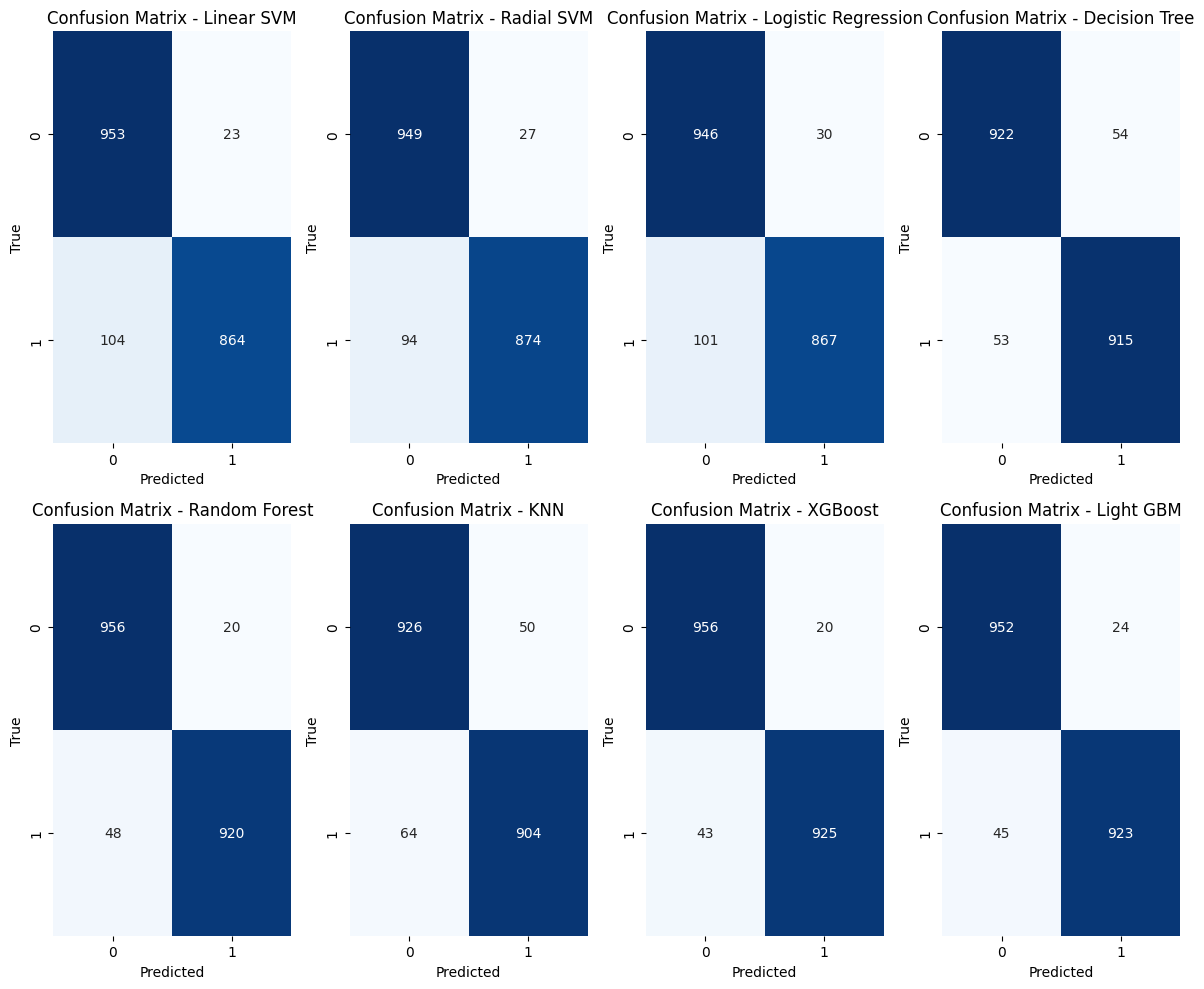

In [127]:
confusion_matrices = {}

for model, clf_name in zip(models, classifiers):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[clf_name] = cm

# Plot the confusion matrices using heatmaps
plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)
for i, (clf_name, cm) in enumerate(confusion_matrices.items()):
    plt.subplot(2, 4, i + 1)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title(f"Confusion Matrix - {clf_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
plt.tight_layout()
plt.show()




In [128]:
confusion_matrices

{'Linear SVM': array([[953,  23],
        [104, 864]]),
 'Radial SVM': array([[949,  27],
        [ 94, 874]]),
 'Logistic Regression': array([[946,  30],
        [101, 867]]),
 'Decision Tree': array([[922,  54],
        [ 53, 915]]),
 'Random Forest': array([[956,  20],
        [ 48, 920]]),
 'KNN': array([[926,  50],
        [ 64, 904]]),
 'XGBoost': array([[956,  20],
        [ 43, 925]]),
 'Light GBM': array([[952,  24],
        [ 45, 923]])}

Observations:

Linear SVM, Radial SVM, Logistic Regression, Random Forest, XGBoost, and Light GBM achieved high accuracy in correctly predicting both positive and negative classes.

Decision Tree and KNN had a relatively higher number of false negatives and false positives compared to other models.

Random Forest, XGBoost, and Light GBM showed better performance in correctly identifying positive cases (higher true positive rate).

Linear SVM, Radial SVM, Logistic Regression, Decision Tree, and KNN had a relatively lower true positive rate but still achieved overall good accuracy.

Overall, Random Forest, XGBoost, and Light GBM showed promising performance with higher accuracy and better identification of positive cases. Decision Tree and KNN had slightly lower performance but still performed reasonably well.




**Hyperparameters:**

**Logistic Regression:**

In [129]:
param_grid = [
    {
        "C": np.linspace(start=1, stop=10, num=10),
        "solver": ["lbfgs", "newton-cg", "sag", "saga"],
        "max_iter": [1000, 2500, 5000],
    }
]


In [130]:
lr = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=3, verbose=True, n_jobs=-1)
best_clf = lr.fit(X_train, y_train)

print("Best Score:", best_clf.best_score_)
print("Best Estimator:", best_clf.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Best Score: 0.9242541152263374
Best Estimator: LogisticRegression(C=9.0, max_iter=1000)


**SVM**



In [131]:
C = [0.1, 0.5, 1.0]
gamma = [0.1, 0.5, 1.0]
kernel = ["rbf"]

hyper = {"kernel": kernel, "C": C, "gamma": gamma}

grid_search = GridSearchCV(estimator=SVC(), param_grid=hyper, verbose=True)
grid_search.fit(X_train,y_train)

print("Best Score:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Score: 0.95704742145331
Best Estimator: SVC(gamma=1.0)


**K-NN**

In [132]:
leaf_size = list(range(5, 21, 5))
n_neighbors = list(range(5, 16, 5))
p = [1]

param_grid = {
    'leaf_size': leaf_size,
    'n_neighbors': n_neighbors,
    'p': p
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=3, verbose=1)
grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [5, 10, 15, 20],
                         'n_neighbors': [5, 10, 15], 'p': [1]},
             verbose=1)

In [133]:
print("Best Score:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)

Best Score: 0.9431584362139919
Best Estimator: KNeighborsClassifier(leaf_size=5, p=1)


**Decision Tree**

In [134]:
# let's define parameters
max_depth_values = range(1, 8)
min_samples_split_values = range(2, 11)
train_scores = []
test_scores = []


In [135]:
# creating a model
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        tree_model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
        tree_model.fit(X_train, y_train)
        train_score = tree_model.score(X_train, y_train)
        test_score = tree_model.score(X_test, y_test)
        train_scores.append([max_depth, min_samples_split, round(train_score, 4)])
        test_scores.append([max_depth, min_samples_split, round(test_score, 4)])
train_scores_df = pd.DataFrame(train_scores, columns=["max_depth", "min_samples_split", "train_score"])
test_scores_df = pd.DataFrame(test_scores, columns=["max_depth", "min_samples_split", "test_score"])
all_scores = train_scores_df.merge(test_scores_df, on=["max_depth", "min_samples_split"])

In [136]:
best_test_score_idx = all_scores["test_score"].idxmax()
best_max_depth = all_scores.loc[best_test_score_idx, "max_depth"]
best_min_samples_split = all_scores.loc[best_test_score_idx, "min_samples_split"]

print("Best max_depth:", best_max_depth)
print("Best min_samples_split:", best_min_samples_split)
print("Train score:", round(train_score, 3))
print("Test score:", round(test_score, 3))


Best max_depth: 7
Best min_samples_split: 9
Train score: 0.905
Test score: 0.897


Observation:

Based on the train and test scores of the decision tree model with a max depth of 7 and min samples split of 9 (train score: 0.90, test score: 0.89),


it appears that the model is performing reasonably well without clear signs of overfitting or underfitting.


 The train and test scores are relatively close, indicating that the model is generalizing well to unseen data. This suggests that the model is effectively capturing the patterns and relationships present in the preprocessed data.

**Feature imoportance for Decision Trees:**

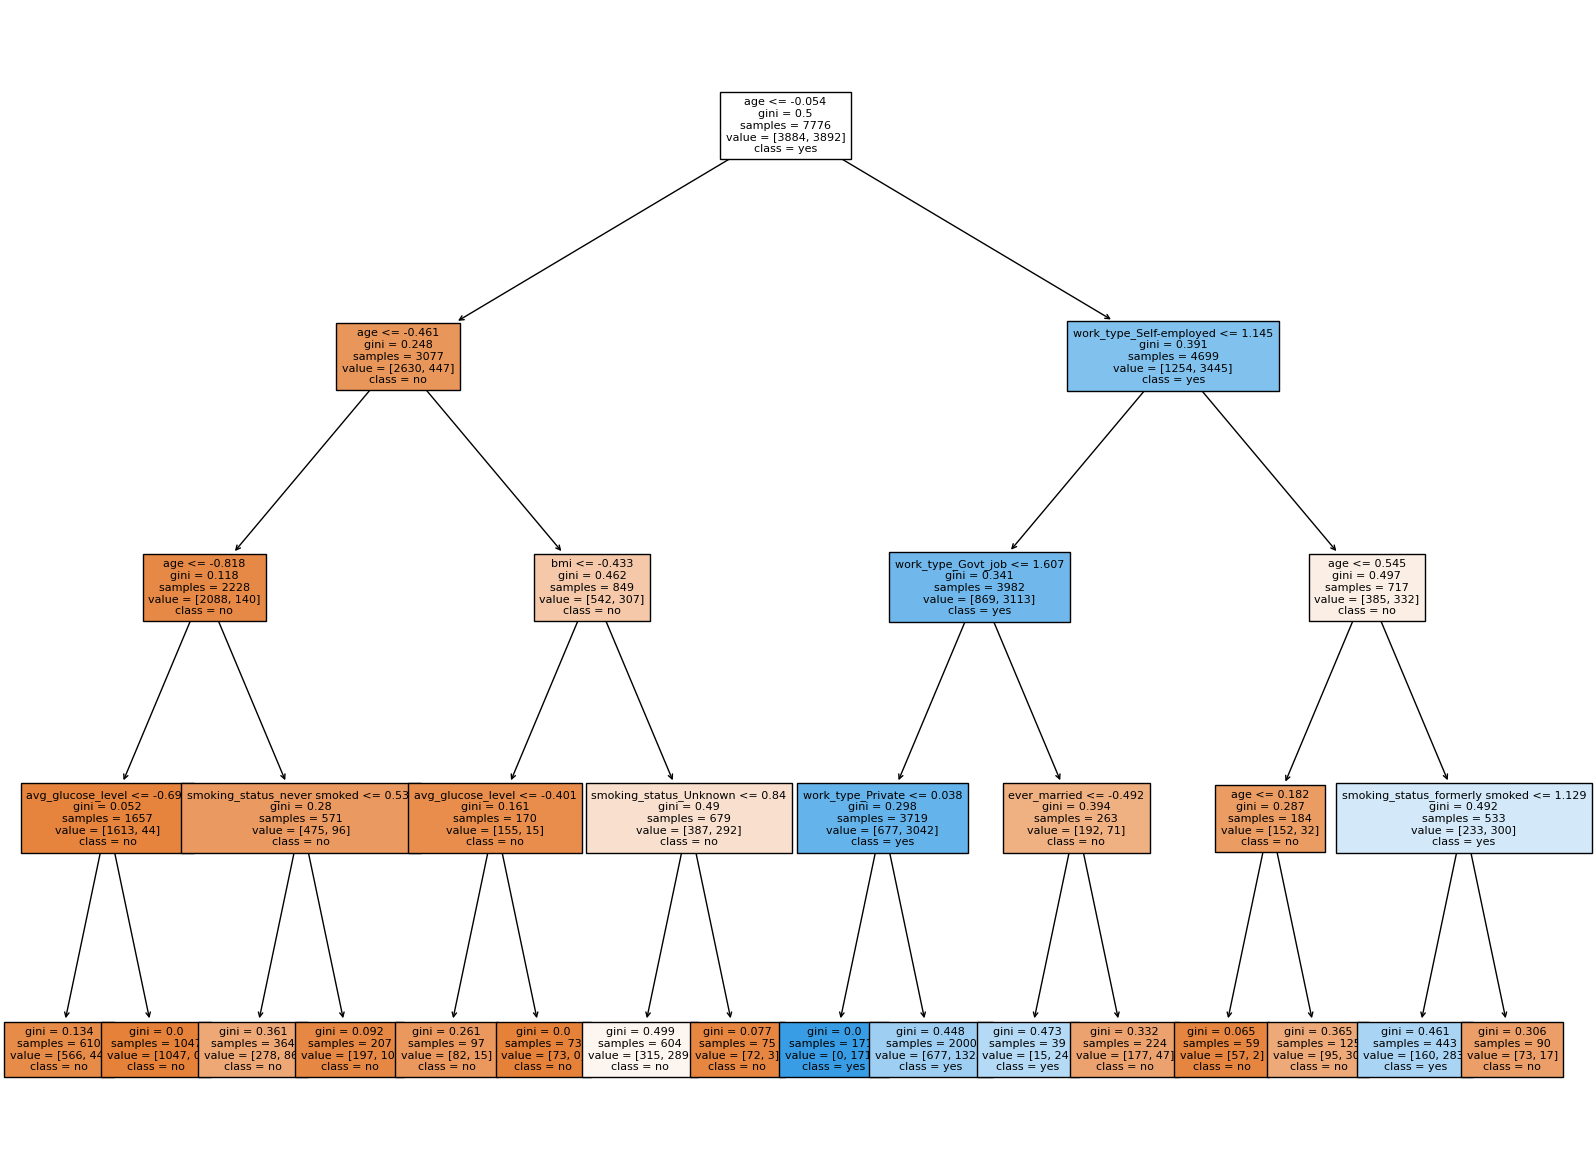

In [137]:
#Visualizing Decision Tree Model for Classification"
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 15))
plot_tree(
    model,
    feature_names=df.iloc[:, 0:-1].columns,
    class_names=["no", "yes"],
    filled=True,
    fontsize=8
)
plt.show()


In [138]:
# feature importance
importance = model.feature_importances_

# Print feature importances
for feature, importance_score in zip(df.columns, importance):
    print(f"{feature}: {importance_score}")

gender: 0.0
age: 0.70938172106245
hypertension: 0.0
heart_disease: 0.0
ever_married: 0.005321169996015291
Residence_type: 0.0
avg_glucose_level: 0.0029232410132414956
bmi: 0.015470733760635342
work_type_Govt_job: 0.07184139191291754
work_type_Never_worked: 0.0
work_type_Private: 0.10316449172497798
work_type_Self-employed: 0.06011561128149265
work_type_children: 0.0
smoking_status_Unknown: 0.01249265974996699
smoking_status_formerly smoked: 0.014748784085776333
smoking_status_never smoked: 0.004540195412526384
smoking_status_smokes: 0.0


In [139]:
import shap

Permutation explainer: 1945it [00:30, 49.18it/s]                          


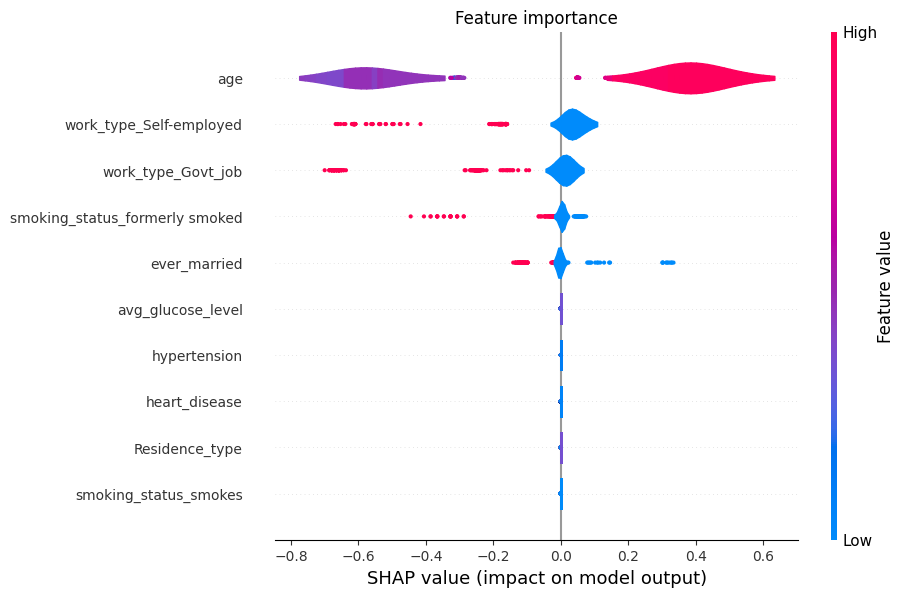

In [140]:
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)
feature_names = df.iloc[:, 0:-1].columns

shap.summary_plot(shap_values, feature_names=feature_names, plot_type="violin",max_display=10,show=False)

fig, ax = plt.gcf(), plt.gca()

fig.set_size_inches(12, 6)
ax.set_title("Feature importance", fontdict={"size": 12})
ax.tick_params(axis="both", which="major", labelsize=10)
ax.tick_params(axis="both", which="minor", labelsize=8)


**Random Forest**

In [141]:
n_estimators_values = np.linspace(start=10, stop=200, num=5, dtype=int)
max_depth_values = np.linspace(start=3, stop=20, num=4, dtype=int)
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 4]

In [142]:
scores_train = []
scores_test = []

for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            for min_samples_leaf in min_samples_leaf_values:
                model = RandomForestClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    random_state=42
                )
                model.fit(X_train, y_train)
                train_score = model.score(X_train, y_train)
                test_score = model.score(X_test, y_test)
                scores_train.append([n_estimators, max_depth, min_samples_split, min_samples_leaf, round(train_score, 4)])
                scores_test.append([n_estimators, max_depth, min_samples_split, min_samples_leaf, round(test_score, 4)])

In [143]:
scores_train = pd.DataFrame(scores_train, columns=["n_estimators", "max_depth", "min_samples_split", "min_samples_leaf", "train_score"])
scores_test = pd.DataFrame(scores_test, columns=["n_estimators", "max_depth", "min_samples_split", "min_samples_leaf", "test_score"])
all_results = scores_train.merge(scores_test, on=["n_estimators", "max_depth", "min_samples_split", "min_samples_leaf"])


In [144]:
all_results

,n_estimators,max_depth,min_samples_split,min_samples_leaf,train_score,test_score
0,10,3,2,1,0.8351,0.8385
1,10,3,2,2,0.8351,0.8385
2,10,3,2,4,0.8351,0.8385
3,10,3,5,1,0.8351,0.8385
4,10,3,5,2,0.8351,0.8385
...,...,...,...,...,...,...
175,200,20,5,2,0.9879,0.9624
176,200,20,5,4,0.9796,0.9583
177,200,20,10,1,0.9864,0.9624
178,200,20,10,2,0.9833,0.9583


In [145]:
best_idx = np.argmax(scores_test["test_score"])
best_params = {
    "n_estimators": all_results.loc[best_idx, "n_estimators"],
    "max_depth": all_results.loc[best_idx, "max_depth"],
    "min_samples_split": all_results.loc[best_idx, "min_samples_split"],
    "min_samples_leaf": all_results.loc[best_idx, "min_samples_leaf"],
}
best_score = all_results.loc[best_idx, "test_score"]

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 1}
Best Score: 0.9676


Observation:

The Random Forest model was evaluated using different combinations of hyperparameters, including the number of estimators, maximum depth, minimum samples split, and minimum samples leaf.

The evaluation resulted in the best parameters of n_estimators=200, max_depth=20, min_samples_split=10, and min_samples_leaf=5, with a corresponding best score of 0.96.


 These parameters represent the configuration that achieved the highest accuracy on the test data, indicating their effectiveness in predicting the target variable.

Feature importance

In [146]:
df=df.drop('cluster', axis=1)


In [147]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
id,,,,,,,,,,,,,,,,,,
9046,0,67.0,0,1,1,0,228.69,36.60,0,0,1,0,0,0,1,0,0,1
51676,1,61.0,0,0,1,1,202.21,34.55,0,0,0,1,0,0,0,1,0,1
31112,0,80.0,0,1,1,1,105.92,32.50,0,0,1,0,0,0,0,1,0,1
60182,1,49.0,0,0,1,0,171.23,34.40,0,0,1,0,0,0,0,0,1,1
1665,1,79.0,1,0,1,1,174.12,24.00,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,1,80.0,1,0,1,0,83.75,29.30,0,0,1,0,0,0,0,1,0,0
44873,1,81.0,0,0,1,0,125.20,40.00,0,0,0,1,0,0,0,1,0,0
19723,1,35.0,0,0,1,1,82.99,30.60,0,0,0,1,0,0,0,1,0,0


In [148]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
feature_names = df.columns[:-1]

# Create a DataFrame to store the feature importance values
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)



In [149]:
feature_importance_df

,Feature,Importance
1,age,0.317940
6,avg_glucose_level,0.125019
7,bmi,0.085149
13,smoking_status_Unknown,0.075002
15,smoking_status_never smoked,0.061093
14,smoking_status_formerly smoked,0.053931
16,smoking_status_smokes,0.051115
11,work_type_Self-employed,0.037488
8,work_type_Govt_job,0.037394
10,work_type_Private,0.036151


Overall, these insights provide valuable information on the important factors influencing the prediction of stroke. It highlights the significance of age, average glucose level, BMI, smoking status, and work-related factors in assessing the risk of stroke.

Permutation explainer: 1945it [17:49,  1.80it/s]


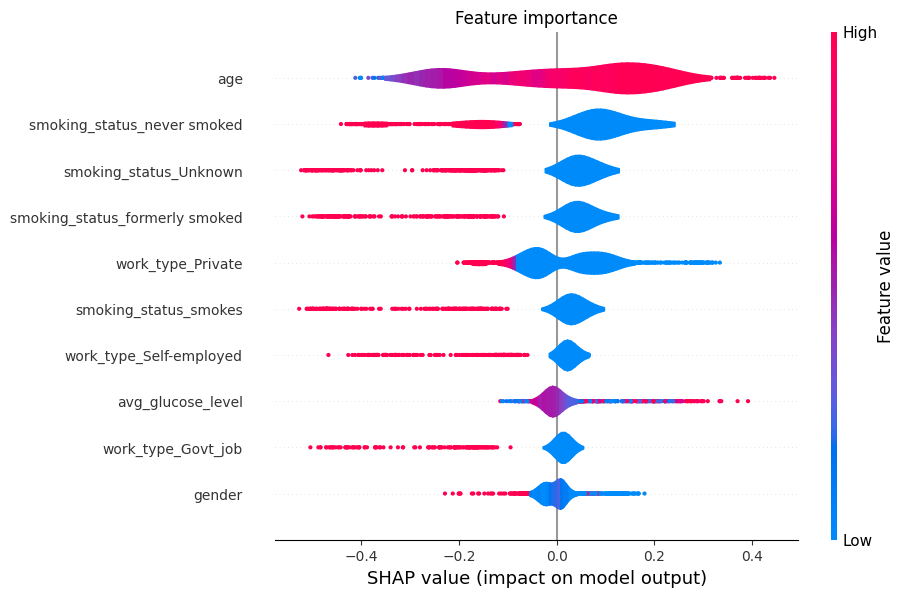

In [150]:
explainer = shap.Explainer(rf_model.predict, X_test)
shap_values = explainer(X_test)
feature_names = df.iloc[:, 0:-1].columns

shap.summary_plot(shap_values, feature_names=feature_names, plot_type="violin",max_display=10,show=False)

fig, ax = plt.gcf(), plt.gca()

fig.set_size_inches(12, 6)
ax.set_title("Feature importance", fontdict={"size": 12})
ax.tick_params(axis="both", which="major", labelsize=10)
ax.tick_params(axis="both", which="minor", labelsize=8)

**XGBoost**



In [151]:
xgboost_model = xgb.XGBClassifier(n_estimators=30, learning_rate=0.1)
xgboost_model.fit(X_train, y_train)
accuracy_scores = cross_val_score(xgboost_model, X_train, y_train, cv=10, scoring="accuracy")
average_accuracy = accuracy_scores.mean()

print("The average accuracy score for XGBoost using cross-validation is:", average_accuracy)

The average accuracy score for XGBoost using cross-validation is: 0.9494608821086971


Permutation explainer: 1945it [01:50, 16.07it/s]


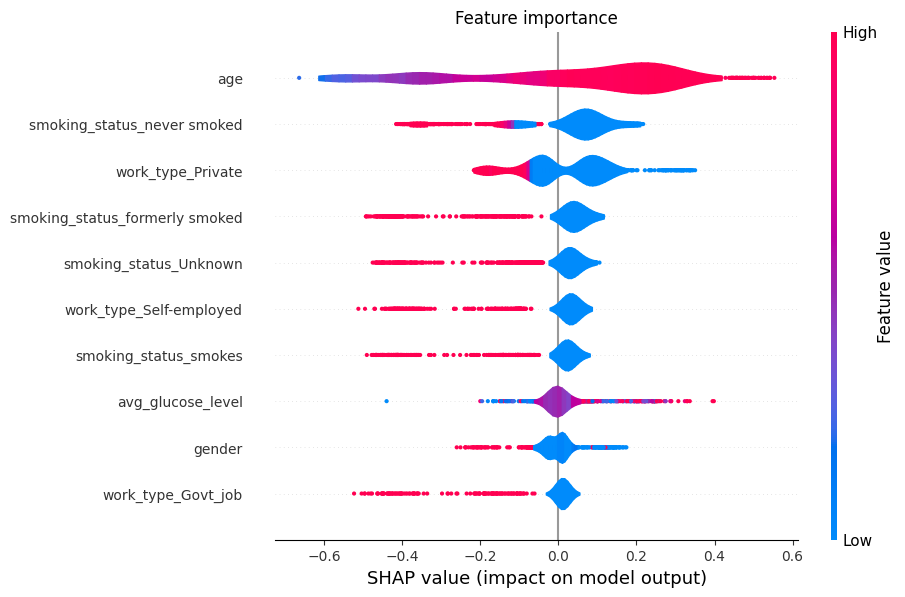

In [152]:
explainer = shap.Explainer(xgboost_model.predict, X_test)
shap_values = explainer(X_test)
feature_names = df.iloc[:, 0:-1].columns

shap.summary_plot(shap_values, feature_names=feature_names, plot_type="violin",max_display=10,show=False)

fig, ax = plt.gcf(), plt.gca()

fig.set_size_inches(12, 6)
ax.set_title("Feature importance", fontdict={"size": 12})
ax.tick_params(axis="both", which="major", labelsize=10)
ax.tick_params(axis="both", which="minor", labelsize=8)

Observation:


The XGBoost model with 30 estimators and a learning rate of 0.1 achieved an average accuracy score of approximately 0.95 in cross-validation. This indicates that the model performs reasonably well in predicting the target variable based on the given features.

**Lightgbm**

In [153]:
hyperparameters = {
    "num_leaves": [10, 20, 30],
    "learning_rate": [0.1, 0.2, 0.3],
    "max_depth": [3, 4, 5],
    "min_child_samples": [10, 20, 30],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.8, 0.9, 1.0]
}

In [154]:
lgb_model = lgb.LGBMClassifier()
grid_search = GridSearchCV(estimator=lgb_model, param_grid=hyperparameters, cv=3, scoring="accuracy")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5],
                         'min_child_samples': [10, 20, 30],
                         'num_leaves': [10, 20, 30],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [155]:
print("Best Score:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)


Best Score: 0.96630658436214
Best Estimator: LGBMClassifier(colsample_bytree=0.8, learning_rate=0.3, max_depth=5,
               min_child_samples=10, num_leaves=20, subsample=0.8)


In [156]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9655349794238683


Permutation explainer: 1945it [04:23,  7.05it/s]


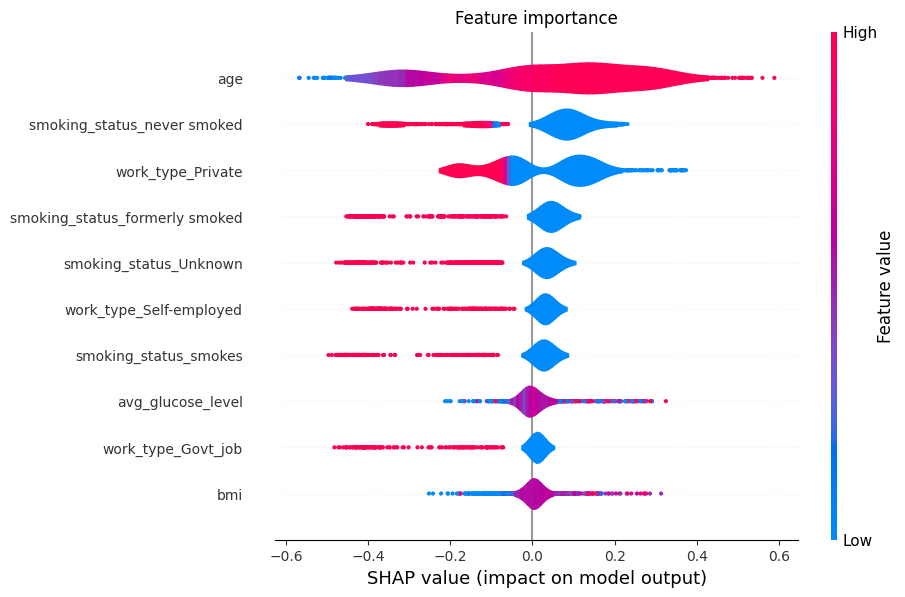

In [157]:
explainer = shap.Explainer(best_model.predict, X_test)
shap_values = explainer(X_test)
feature_names = df.iloc[:, 0:-1].columns

shap.summary_plot(shap_values, feature_names=feature_names, plot_type="violin",max_display=10,show=False)

fig, ax = plt.gcf(), plt.gca()

fig.set_size_inches(12, 6)
ax.set_title("Feature importance", fontdict={"size": 12})
ax.tick_params(axis="both", which="major", labelsize=10)
ax.tick_params(axis="both", which="minor", labelsize=8)

In [158]:
# random forext has high score

r_best_model = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    random_state=42
)
r_best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [159]:
import joblib

joblib.dump(r_best_model, "best_model.pkl")


['best_model.pkl']

In [160]:
df.to_csv('preprocessed_data.csv', index=False)


## **Conclusion:**

In our analysis of the stroke dataset, we compared the performance of different machine learning models in predicting stroke occurrence. Among the models evaluated, Random Forest and LightGBM stood out as the top performers, achieving accuracy scores of 96.7% and 96.6% respectively.

In this analysis, we explored the stroke dataset to gain insights into the factors associated with stroke occurrence. Here are the key findings from our analysis:

Age: Age emerged as the most important feature in predicting stroke occurrence. As age increases, the likelihood of experiencing a stroke also increases. This highlights the importance of age as a risk factor for stroke.

Glucose Level: Higher average glucose levels were found to be associated with an increased risk of stroke. Monitoring and managing glucose levels can play a crucial role in stroke prevention.

BMI: Higher BMI (Body Mass Index) was also identified as a risk factor for stroke. Maintaining a healthy weight through regular exercise and a balanced diet is essential in reducing the risk of stroke.

Smoking Status: Smoking status showed significant influence on stroke occurrence. Individuals who were current smokers or formerly smoked had a higher risk of stroke compared to those who never smoked. Quitting smoking can significantly reduce the risk of stroke.

Work Type: Certain work types, such as self-employment and government jobs, were associated with a higher risk of stroke. Occupational factors and stress levels may contribute to this association.

Overall, this analysis emphasizes the importance of age, glucose levels, BMI, smoking status, and work type in predicting stroke occurrence. By addressing these risk factors and adopting healthy lifestyle choices, such as maintaining a balanced diet, engaging in regular physical activity, and quitting smoking, individuals can significantly reduce their chances of experiencing a stroke.

It is important to note that this analysis is based on the available dataset and may not capture all possible factors influencing stroke occurrence. Further research and analysis incorporating a larger and more diverse dataset can provide deeper insights into the complex dynamics of stroke risk factors.

